In [1]:
import numpy as np

In [2]:
parPercents=[83.8202, 84.1504, 84.4806, 84.8108, 85.1410, 85.4712, 85.8014, 86.1316, 86.4816, 86.7920, 87.1222, 87.4524, 87.7826, 88.1128, 88.4430]
superfluousPercents=list(range(2, 31, 2))
egPercents=[100-par for par in parPercents]
egPercents

[16.1798,
 15.849599999999995,
 15.519400000000005,
 15.1892,
 14.858999999999995,
 14.528800000000004,
 14.198599999999999,
 13.868399999999994,
 13.5184,
 13.207999999999998,
 12.877799999999993,
 12.547600000000003,
 12.217399999999998,
 11.887200000000007,
 11.557000000000002]

In [ ]:
(5.5/807.51)/((5.5/807.51)+(31)/914)

0.16723325929205807

In [4]:
nonsuperfluousPar=[par-sup for par, sup in zip(parPercents, superfluousPercents)]
nonsuperfluousEGPer=[egPer/(egPer+nonSupPar) for egPer, nonSupPar in zip(egPercents, nonsuperfluousPar)]

In [5]:
nonsuperfluousEGPer

[0.1651,
 0.16509999999999994,
 0.16510000000000005,
 0.1651,
 0.16509999999999994,
 0.16510000000000005,
 0.1651,
 0.16509999999999994,
 0.16485853658536584,
 0.16509999999999997,
 0.1650999999999999,
 0.16510000000000002,
 0.16509999999999997,
 0.1651000000000001,
 0.16510000000000002]

(15, 15)

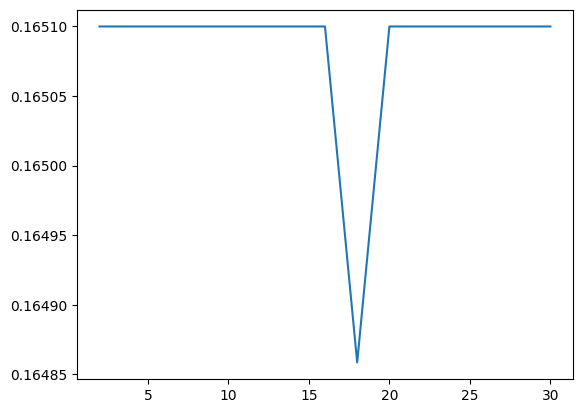

In [6]:
import matplotlib.pyplot as plt
plt.plot(superfluousPercents, nonsuperfluousEGPer)
len(superfluousPercents), len(nonsuperfluousEGPer)

[0.02084188443471519, 0.0] 0.9791581155652848


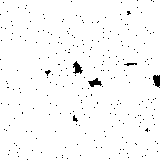

In [77]:
absorptionRate=.1651
import random
import torch
import torchvision as tv

grid=torch.rand((160, 160))

tensorToImageTransform=tv.transforms.ToPILImage()

def corePhase(grid, prob=0.05):
    return (grid>prob).float()

tensorToImageTransform(grid)

def generateSampleFromPaper(rows, cols, growthProb, endingVol):
    growthMaterial=1
    vol=0
    totVol=rows*cols
    nonGrowthEndingVol=endingVol
    grid=[[(int)(not growthMaterial)]*cols for i in range(rows)]
    cores=[]
    coreProb=350*endingVol/(rows*cols)
    for row in range(rows):
        if vol/totVol>=nonGrowthEndingVol:
            break
        for col in range(cols):
            if random.random()<coreProb:
                grid[row][col]=growthMaterial
                vol+=1
                cores.append([row, col])

    dirs = [[0,1],[0,-1],[1,1],[1,-1],[1,0],[-1,1],[-1,-1],[-1,0]]
    iters=0
    prevVol=0

    print(nonGrowthEndingVol, vol, totVol)
    
    while vol/totVol<nonGrowthEndingVol:
        idx=random.randint(0, len(cores)-1)
        [currX, currY]=cores[idx]
        adjNonGrowth=False
        for dir in dirs:
            nx, ny=currX+dir[0], currY+dir[1]
            if nx<0 or nx>=rows or ny<0 or ny>=cols:
                continue
            if grid[nx][ny]!=growthMaterial and random.random()<growthProb:
                grid[nx][ny]=growthMaterial
                cores.append([nx, ny])
                vol+=1
            if grid[nx][ny]!=growthMaterial:
                adjNonGrowth=True
        if not adjNonGrowth:
            cores[idx], cores[-1]=cores[-1], cores[idx]
            cores.pop()
        iters+=1
        if iters%(10000/growthProb)==0:
            print(iters, vol/totVol, vol, totVol, nonGrowthEndingVol, len(cores))
            if prevVol==vol:
                break
            prevVol=vol
    
    return grid

def generateSample3(rows, cols, coreProb, growthProb, wtPercent):
    growthMaterial=(int)(wtPercent>=4)
    vol=0
    totVol=rows*cols
    pDensity=914
    egDensity=269
    egPerSaturatedEG=0.1651
    nonGrowthEndingVol=(wtPercent/egDensity)/(egPerSaturatedEG*(wtPercent/egDensity+(100-wtPercent)/pDensity)) if wtPercent<4 else 1-(wtPercent/egDensity)/(egPerSaturatedEG*(wtPercent/egDensity+(100-wtPercent)/pDensity))
    grid=[[(int)(not growthMaterial)]*cols for i in range(rows)]
    cores=[]
    coreProb=min(nonGrowthEndingVol, coreProb)
    for row in range(rows):
        if vol/totVol>=nonGrowthEndingVol:
            break
        for col in range(cols):
            if random.random()<coreProb:
                grid[row][col]=growthMaterial
                vol+=1
                cores.append([row, col])

    dirs = [[0,1],[0,-1],[1,1],[1,-1],[1,0],[-1,1],[-1,-1],[-1,0]]
    iters=0
    prevVol=0

    print(nonGrowthEndingVol, vol, totVol)
    
    while vol/totVol<nonGrowthEndingVol:
        idx=random.randint(0, len(cores)-1)
        [currX, currY]=cores[idx]
        adjNonGrowth=False
        for dir in dirs:
            nx, ny=currX+dir[0], currY+dir[1]
            if nx<0 or nx>=rows or ny<0 or ny>=cols:
                continue
            if grid[nx][ny]!=growthMaterial and random.random()<growthProb:
                grid[nx][ny]=growthMaterial
                cores.append([nx, ny])
                vol+=1
            if grid[nx][ny]!=growthMaterial:
                adjNonGrowth=True
        if not adjNonGrowth:
            cores[idx], cores[-1]=cores[-1], cores[idx]
            cores.pop()
        iters+=1
        if iters%(10000/growthProb)==0:
            print(iters, vol/totVol, vol, totVol, nonGrowthEndingVol, len(cores))
            if prevVol==vol:
                break
            prevVol=vol
    
    return grid
            
def generateHybridSample2(rows, cols, coreProbs, growthProbs, wts, densities, absorptionRates, nonGrowthDensity):
    numMaterials=len(coreProbs)
    materials=[i/numMaterials for i in range(numMaterials)]
    grid=[[1]*cols for i in range(rows)]
    cores=[[] for i in range(numMaterials)]
    totVol=sum([wt/d for wt, d in zip(wts, densities)])+(100-sum(wts))/nonGrowthDensity
    vols=[(wt/d)/a/totVol for wt, d, a in zip(wts, densities, absorptionRates)]
    print(vols, 1-sum(vols))
    currVols=[0 for i in range(numMaterials)]
    vol=0

    for i in range(numMaterials):
        coreProb=min(vols[i], coreProbs[i])*rows*cols/(rows*cols-vol)
        for row in range(rows):
            for col in range(cols):
                if random.random()<coreProb and grid[row][col]==1:
                    grid[row][col]=materials[i]
                    vol+=1
                    totGrowth=growthProbs[i]*random.uniform(0.2, 0.8)
                    vertGrowth=totGrowth*random.uniform(0.05, 0.95)
                    horGrowth=totGrowth-vertGrowth
                    cores[i].append([row, col, vertGrowth, horGrowth])
                    currVols[i]+=1

    for i in range(numMaterials):
        for _ in range(int(rows*cols*0.01)):  # Adjust sparsity factor
            if currVols[i]/(rows*cols)>=vols[i]:
                break
            row, col=random.randint(0, rows-1), random.randint(0, cols-1)
            if grid[row][col]==1:
                grid[row][col]=materials[i]
                currVols[i]+=1

    dirs = [[0,1],[0,-1],[1,1],[1,-1],[1,0],[-1,1],[-1,-1],[-1,0]]
    iters=0
    while any([currVol/(rows*cols)<endVol for currVol, endVol in zip(currVols, vols)]):
        for i in range(numMaterials):
            if currVols[i]/(rows*cols)>=vols[i]:
                continue
            idx=random.randint(0, len(cores[i])-1)
            [currX, currY, vertGrowth, horGrowth]=cores[i][idx]
            adjNonGrowth=False
            for dir in dirs:
                nx, ny=currX+dir[0], currY+dir[1]
                if nx<0 or nx>=rows or ny<0 or ny>=cols:
                    continue
                if dir[0]==0 and grid[nx][ny]==1 and random.random()<vertGrowth:
                    grid[nx][ny]=materials[i]
                    cores[i].append([nx, ny, vertGrowth, horGrowth])
                    currVols[i]+=1
                if dir[1]==0 and grid[nx][ny]==1 and random.random()<horGrowth:
                    grid[nx][ny]=materials[i]
                    cores[i].append([nx, ny, vertGrowth, horGrowth])
                    currVols[i]+=1
                if grid[nx][ny]==1:
                    adjNonGrowth=True
            if not adjNonGrowth:
                cores[i][idx], cores[i][-1]=cores[i][-1], cores[i][idx]
                cores[i].pop()
    return grid
#microCT
grid=generateHybridSample2(rows=160, cols=160, coreProbs=[0.0005, 0.005], growthProbs=[0.1, 0.1], wts=[5, 0], densities=[2260, 2200], absorptionRates=[1, 1], nonGrowthDensity=914)
#ML paper
# grid=generateSample3(160, 160, 0.002, 0.1, 3.9)
display(tensorToImageTransform(torch.tensor(grid, dtype=torch.float32)))

In [8]:
import cProfile
# grid=torch.rand((160, 160))
# grid=[[1]*160 for i in range(160)]
# grid=generateSample3(160, 160, (random.random()%0.0005)+0.001, 0.05, 4.5)

0.6 226 40000


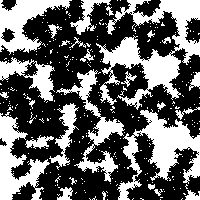

In [8]:
grid=np.array(generateSampleFromPaper(200, 200, 0.01, 0.6), dtype=np.float32)
grid=np.where(grid==1, 0.0, 1.0)
display(tensorToImageTransform(grid))

In [126]:
from scipy.ndimage import label, find_objects

def get_cluster_widths(grid):
    """
    Given a 2D grid (numpy array) where clusters are defined as connected regions of 0s,
    return a dictionary mapping each cluster label to its “width” (the horizontal span
    of the bounding box) and the labeled array.
    """
    # Create a boolean mask for zeros (clusters)
    zero_mask = (grid == 0)
    # Label the contiguous clusters of 0s.
    # (By default, label uses a connectivity structure that considers neighbors in all directions;
    # if you want only 4-connected neighbors, you can pass an appropriate structure.)
    structure = np.array([[0, 1, 0],
                          [1, 1, 1],
                          [0, 1, 0]], dtype=int)
    labeled_array, num_features = label(zero_mask, structure=structure)
    # Get bounding box slices for each cluster
    slices = find_objects(labeled_array)
    
    cluster_widths = {}
    for i, sl in enumerate(slices, start=1):
        if sl is None:
            continue
        # Here we define the width as the horizontal span of the bounding box.
        # That is: width = (rightmost index - leftmost index)
        width = sl[1].stop - sl[1].start
        cluster_widths[i] = width
    return cluster_widths, labeled_array

def assign_effective_k_map(grid, mapping, default_k):
    """
    Given:
      - grid: a 2D numpy array with 0s (the clusters) and 1s,
      - mapping: a dictionary where keys are tuples (min_width, max_width) and
                 the values are the effective thermal conductivities for clusters with widths in that range,
      - default_k: the default thermal conductivity to use if a cluster’s width is not in any range.
    
    Returns:
      - effective_k_map: a 2D array (same shape as grid) where every cell with a 0 in grid
                         is replaced by its effective thermal conductivity (looked up via mapping),
                         and all other cells remain at default_k (or you can later override them).
    """
    cluster_widths, labeled_array = get_cluster_widths(grid)
    # Initialize the effective conductivity map with the default (e.g. your original ks[1])
    effective_k_map = np.full(grid.shape, default_k, dtype=float)
    maxWidth=0
    # Loop over each cluster (labels are 1,2,...)
    for label_val, width in cluster_widths.items():
        maxWidth=max(maxWidth, width)
        effective_k = default_k  # if no mapping range is found, use default_k
        for (min_w, max_w), k_eff in mapping.items():
            if min_w <= width <= max_w:
                effective_k = k_eff
                break
        # Replace the conductivity for all cells in this cluster.
        effective_k_map[labeled_array == label_val] = effective_k
    return effective_k_map

def shift(array, shift_x, shift_y):
    shifted_array=np.copy(array)

    # Shift along the x-axis (rows)
    if shift_x>0:
        shifted_array[shift_x:, :]=array[:-shift_x, :]
        shifted_array[:shift_x, :]=0
    elif shift_x<0:
        shifted_array[:shift_x, :]=array[-shift_x:, :]
        shifted_array[shift_x:, :]=0

    # Shift along the y-axis (columns)
    if shift_y>0:
        shifted_array[:, shift_y:]=shifted_array[:, :-shift_y]
        shifted_array[:, :shift_y]=0
    elif shift_y<0:
        shifted_array[:, :shift_y]=shifted_array[:, -shift_y:]
        shifted_array[:, shift_y:]=0
    return shifted_array
dirs=[[1,0],[0,1],[-1,0],[0,-1]]
# for dir, [x,y] in enumerate(dirs):
#     distF[dir]=shift(distF[dir], x, y)
# distF

In [80]:
import csv
pixelSize=1e-3/160
mapping={}
with open(f'./data/k1FM_k1FF_c1_0{5}wt.csv', mode='r') as infile:
    reader=csv.reader(infile)
    prev=0
    for row in reader:
        mapping[(prev, float(row[0])/6.25e-6)]=float(row[1])
        prev=float(row[0])/6.25e-6
print(mapping)

{(0, 0.15999999999999998): 7.56965190037193, (0.15999999999999998, 0.17576658271800957): 8.31307777939176, (0.17576658271800957, 0.19308682250229278): 9.12872805298586, (0.19308682250229278, 0.21211381849441757): 10.0235075136911, (0.21211381849441757, 0.23301575640019836): 11.0049583585418, (0.23301575640019836, 0.2559773951369696): 12.0813143575026, (0.2559773951369696, 0.28120169997676636): 13.2615586554661, (0.28120169997676636, 0.30891163662132004): 14.55548523933, (0.30891163662132004, 0.33935214206723036): 15.9737640453235, (0.33935214206723036, 0.3727922896824592): 17.5280096100317, (0.3727922896824592, 0.4095276676319248): 19.230853078645, (0.4095276676319248, 0.44988299167587675): 21.0960172726902, (0.44988299167587675, 0.49421497543639675): 23.1383943833871, (0.49421497543639675, 0.5429154835032528): 25.3741256920436, (0.5429154835032528, 0.5964149952503904): 27.8206825215208, (0.5964149952503904, 0.6551864099808687): 30.4969473886159, (0.6551864099808687, 0.7197492270351104

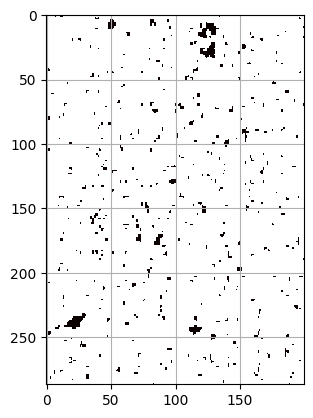

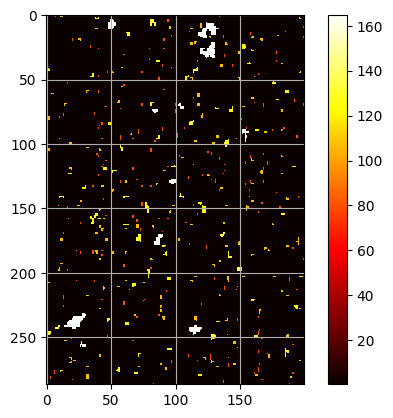

relaxation times 1.3459665948440118 0.5012474692734002
0 0.00043402708280073564
10000 1.6452052252587477e-07
20000 8.652308056342719e-08
30000 5.972189167452688e-08
40000 4.6206905096384605e-08
50000 3.8012857623878254e-08
60000 3.247529415617729e-08
70000 2.846180713512804e-08
80000 2.540862181034957e-08
90000 2.300195596627297e-08
100000 2.1052398566890763e-08
110000 1.9438461059531877e-08
120000 1.8078492399109212e-08
130000 1.6915533892076837e-08
140000 1.5908614618420535e-08
150000 1.5027491000048493e-08
160000 1.4249334277528237e-08
170000 1.3556576357994107e-08
180000 1.2935465908633224e-08
190000 1.237507792988701e-08
200000 1.1866617549034637e-08
210000 1.1402922743600731e-08
220000 1.0978099462096984e-08
230000 1.0587252562619265e-08
240000 1.0226282353008868e-08
250000 9.891729111637511e-09
260000 9.580653027705947e-09
270000 9.290540165310203e-09
280000 9.019228103302923e-09
290000 8.764847062427276e-09
300000 8.525771858193286e-09
310000 8.300583092176258e-09
320000 8.0880

In [ ]:
def lbm(grid, ks, rhos, cps, dt, length=1e-3, width=1e-3, tHot=293, tCold=283):
    if type(grid) is list:
        grid=np.array(grid)
    plt.imshow(grid, cmap='hot', interpolation='nearest')
    plt.grid()
    plt.pause(0.1)

    effective_k_map = assign_effective_k_map(grid, mapping, default_k=ks[1])
    kMap = np.where(grid == 1, ks[0], effective_k_map)

    plt.imshow(kMap, cmap='hot', interpolation='nearest')
    plt.grid()
    plt.colorbar()
    plt.pause(0.1)

    rows, cols=grid.shape
    tHot=293
    tCold=283
    dirs=[[1,0],[0,1],[-1,0],[0,-1]]

    # calculate thermal diffusivities in lattice units
    dx=width/cols
    diffusivity_map = np.where(grid == 1,
                               ks[0] / (rhos[0] * cps[0]),
                               kMap / (rhos[1] * cps[1]))
    lb_diffusivity_map = diffusivity_map * dt / (dx ** 2)
    # thermalDiffusivities=[tc/(rho*cp) for tc, rho, cp in zip(ks, rhos, cps)]
    # print(thermalDiffusivities)
    # lbThermalDiffusivities=[td*dt/(dx)**2 for td in thermalDiffusivities]

    # initialize temperature, relaxation time, and heat capacity maps
    T=np.full((rows, cols), (tHot+tCold)/2)
    # tauMap=np.where(grid==1, 2*lb_diffusivity_map+0.5, 2*lb_diffusivity_map+0.5)
    tauMap=2*lb_diffusivity_map+0.5
    heatCapMap=np.where(grid==1, rhos[0]*cps[0], rhos[1]*cps[1])
    print('relaxation times', np.max(tauMap), np.min(tauMap))
    T[:,0]=tHot
    T[:,-1]=tCold

    # initialize distribution function
    omega=1/4
    distF=np.zeros((4, rows, cols))
    distF[:,:,:]=T[:,:]*omega

    # main simulation loop
    tolerance=3e-9
    for i in range(10000000):
        T_old=T.copy()

        T=np.sum(distF, axis=0)

        # collision
        for dir in range(4):
            distF[dir]-=(distF[dir]-T*omega)/tauMap
                
        # streaming step
        for dir, [x,y] in enumerate(dirs):
            distF[dir]=shift(distF[dir], x, y)

        # top/bottom neumann boundary conditions
        distF[0,0,:]=distF[2,0,:]
        distF[2,-1,:]=distF[0,-1,:]

        # reset left/right boundary conditions
        distF[1,:,0]=tHot-distF[0,:,0]-distF[2,:,0]-distF[3,:,0]
        distF[3,:,-1]=tCold-distF[0,:,-1]-distF[1,:,-1]-distF[2,:,-1]

        # update temp
        T=np.sum(distF, axis=0)

        # verify how much temp changed
        error=np.sqrt(np.sum(np.square((T-T_old)))/np.sum(np.square(T)))
        if i%10000==0:
            print(i, error)
        if error<tolerance:
            print("CONVERGED ON STEP", i, "WITH ERROR", error)
            break
    # Calculate thermal conductivity
    deltaT=tHot-tCold
    # qFlux=np.sum((distF[1]-distF[3])*heatCapMap*(tauMap-0.5)/tauMap)*(dx/dt)/(rows*cols)
    # cond=length*qFlux/deltaT
    conds=[2*dx*np.sum((distF[1,:,i]-distF[3,:,i])/(T[:,i-1]-T[:,i+1])*heatCapMap[:,i]*(tauMap[:,i]-0.5)/tauMap[:,i])*(dx/dt)/rows for i in range(1, cols-1)]
    # conds=[2*dx*np.sum((distF[1,:,i]-distF[3,:,i])/(T[:,i-1]-T[:,i+1])*heatCapMap[:,i]*(np.mean(tauMap)-0.5)/np.mean(tauMap))*(dx/dt)/rows for i in range(1, cols-1)]
    return conds, T, distF
cond, T, distF=lbm(grid=grid, ks=[0.305, 2200], rhos=[914, 700], cps=[2140, 2229], dt=1e-7)
cond

In [82]:
print(sum(cond)/len(cond))

5.370777369526748


In [293]:
gammaMapping={}
gammaMapping[0.01]={}
gammaMapping[0.0006]={}
with open(f'./data/k_gamma400.csv', mode='r') as infile:
    reader=csv.reader(infile)
    prev=0
    resolution=20e-6
    threshold=100e-6
    for i, row in enumerate(reader):
        if i==0:
            continue
        for wt, col in enumerate(range(1, 16, 3)):
            if wt+1 not in gammaMapping[0.01]:
                gammaMapping[0.01][wt+1]={}
            if wt+1 not in gammaMapping[0.0006]:
                gammaMapping[0.0006][wt+1]={}
            gammaMapping[0.01][wt+1][(prev, float(row[0])/resolution)]=float(row[col+1]) if float(row[0])>=threshold else float(row[-(wt+1)])
            gammaMapping[0.0006][wt+1][(prev, float(row[0])/resolution)]=float(row[col+2]) if float(row[0])>=threshold else float(row[-(wt+1)])
        prev=float(row[0])/resolution
gammaMapping

{0.01: {1: {(0, 0.049999999999999996): 7.27947485254301,
   (0.049999999999999996, 0.0503469315738015): 7.32790156203401,
   (0.0503469315738015, 0.05069627037794049): 7.37663421093046,
   (0.05069627037794049, 0.051048033115302496): 7.42567453114603,
   (0.051048033115302496, 0.051402236604665495): 7.47502426172899,
   (0.051402236604665495, 0.051758897781509): 7.52468514885456,
   (0.051758897781509, 0.052118033698819996): 7.5746589458164,
   (0.052118033698819996, 0.052479661527911496): 7.6249474130176,
   (0.052479661527911496, 0.05284379855923999): 7.67555231796096,
   (0.05284379855923999, 0.053210462203236): 7.7264754352385,
   (0.053210462203236, 0.0535796699911335): 7.77771854652039,
   (0.0535796699911335, 0.053951439575809): 7.82928344054322,
   (0.053951439575809, 0.054325788732626994): 7.88117191309738,
   (0.054325788732626994, 0.054702735360287): 7.93338576701394,
   (0.054702735360287, 0.055082297481682994): 7.98592681215057,
   (0.055082297481682994, 0.0554644932447609

[0.004068478638261504, 0.0] 0.9959315213617385


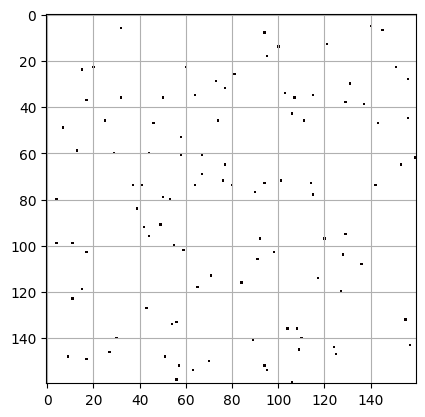

1


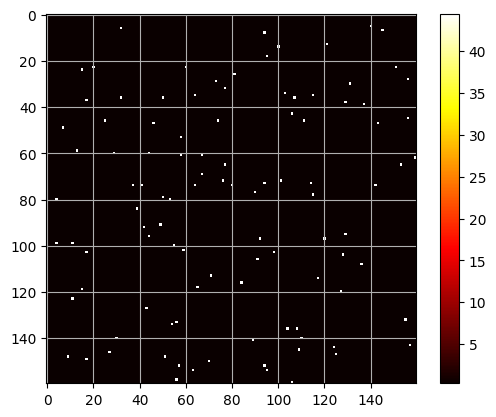

relaxation times 0.6459962781433513 0.5007983803349761
0 0.0004852568363577819
10000 1.8443930433364254e-07
20000 1.0190111942811049e-07
30000 7.14266799660532e-08
40000 5.5290655341897174e-08
50000 4.526241649952567e-08
60000 3.8425900027029705e-08
70000 3.347200268655935e-08
80000 2.9722316901884857e-08
90000 2.678889448296346e-08
100000 2.4433152226847652e-08
110000 2.2500000338840072e-08
120000 2.0884221458065298e-08
130000 1.951202968469049e-08
140000 1.8330309954590996e-08
150000 1.7300013301630577e-08
160000 1.6391920992127295e-08
170000 1.5583832756290316e-08
180000 1.4858646884462485e-08
190000 1.4203021940488116e-08
200000 1.3606422447097851e-08
210000 1.3060434282544903e-08
220000 1.2558261830196094e-08
230000 1.2094358068297486e-08
240000 1.1664148113285667e-08
250000 1.1263820905610015e-08
260000 1.0890172443586074e-08
270000 1.0540484263688172e-08
280000 1.0212429997993307e-08
290000 9.904003882669598e-09
300000 9.61346281447727e-09
310000 9.339281717794214e-09
320000 9.0

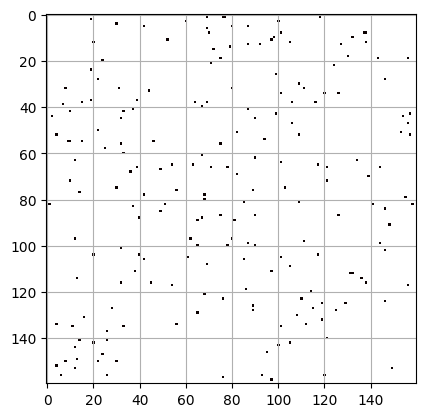

2


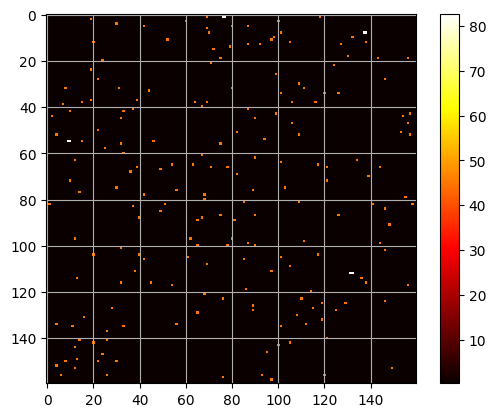

relaxation times 0.7714783157778746 0.5007983803349761
0 0.0004852568363577819
10000 2.4473198009228925e-07
20000 1.252614273019465e-07
30000 8.54837888793993e-08
40000 6.604682840265091e-08
50000 5.455967320758831e-08
60000 4.690335851650243e-08
70000 4.136774898497878e-08
80000 3.713287738779851e-08
90000 3.376025759211356e-08
100000 3.09940559463319e-08
110000 2.8674099650172648e-08
120000 2.6694225701793647e-08
130000 2.4980770303045532e-08
140000 2.3480709863477344e-08
150000 2.2154732165671524e-08
160000 2.097298323174397e-08
170000 1.9912332906122796e-08
180000 1.8954555009973535e-08
190000 1.8085072540179475e-08
200000 1.72920722858102e-08
210000 1.6565867543143425e-08
220000 1.5898426021470136e-08
230000 1.5283020953184845e-08
240000 1.471396470978642e-08
250000 1.4186406509947647e-08
260000 1.3696176535868645e-08
270000 1.323966184493648e-08
280000 1.2813710496275591e-08
290000 1.2415556406109354e-08
300000 1.2042756701594755e-08
310000 1.169314316324529e-08
320000 1.13647820

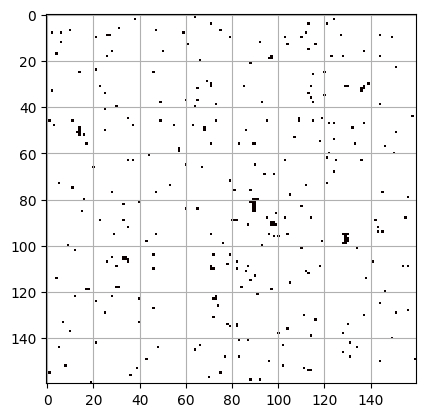

4


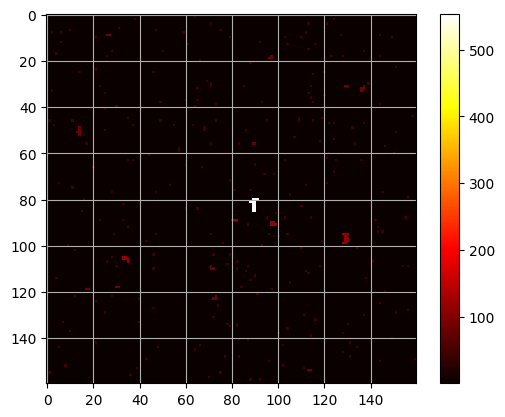

relaxation times 2.3177802258043014 0.5007983803349761
0 0.0004852568363577819
10000 2.6711983594394565e-07
20000 1.3805704373763266e-07
30000 9.453796665075042e-08
40000 7.258137932974529e-08
50000 5.925699153811719e-08
60000 5.027808952281834e-08
70000 4.379645223164792e-08
80000 3.887656907611564e-08
90000 3.499456889701192e-08
100000 3.1836306554349923e-08
110000 2.920353639078545e-08
120000 2.6965836187699962e-08
130000 2.503424084585311e-08
140000 2.334604711659582e-08
150000 2.1855716086146486e-08
160000 2.0529256199436177e-08
170000 1.934065724252281e-08
180000 1.8269569331705622e-08
190000 1.7299755434421425e-08
200000 1.641803509742743e-08
210000 1.5613546737145756e-08
220000 1.4877223697648402e-08
230000 1.4201410131692683e-08
240000 1.3579578130756188e-08
250000 1.3006113726545345e-08
260000 1.2476152012999425e-08
270000 1.1985449714346732e-08
280000 1.1530282952435016e-08
290000 1.1107366872400693e-08
300000 1.0713791467595847e-08
310000 1.0346966731467278e-08
320000 1.000

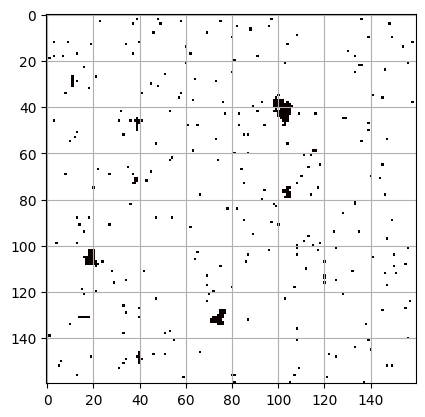

9


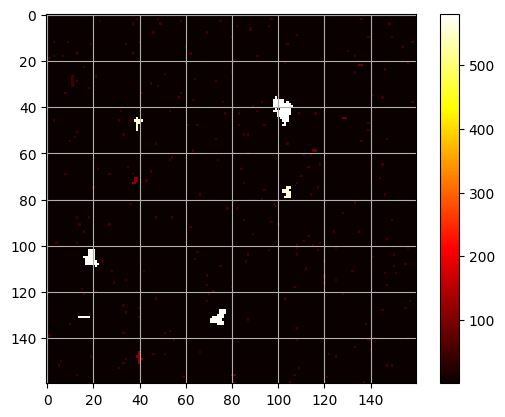

relaxation times 2.406508484626445 0.5007983803349761
0 0.0004852568363577819
10000 2.7272149654352934e-07
20000 1.442070910889537e-07
30000 9.96351928518612e-08
40000 7.641569741652643e-08
50000 6.195009848361556e-08
60000 5.204288380575449e-08
70000 4.486011440342743e-08
80000 3.9443520100992034e-08
90000 3.523160429147391e-08
100000 3.18711628269062e-08
110000 2.912977941252754e-08
120000 2.684966851718364e-08
130000 2.4921067101545787e-08
140000 2.3265984070382803e-08
150000 2.1827900914342864e-08
160000 2.0565077355013826e-08
170000 1.9446114677357273e-08
180000 1.8446967890224612e-08
190000 1.7548906048509746e-08
200000 1.6737100473745787e-08
210000 1.599963147843981e-08
220000 1.5326783745085414e-08
230000 1.4710536330060727e-08
240000 1.4144190710429e-08
250000 1.3622093864935067e-08
260000 1.31394319646304e-08
270000 1.2692071127074935e-08
280000 1.2276436081199254e-08
290000 1.1889414556216245e-08
300000 1.1528282030162328e-08
310000 1.1190641354653931e-08
320000 1.0874374202

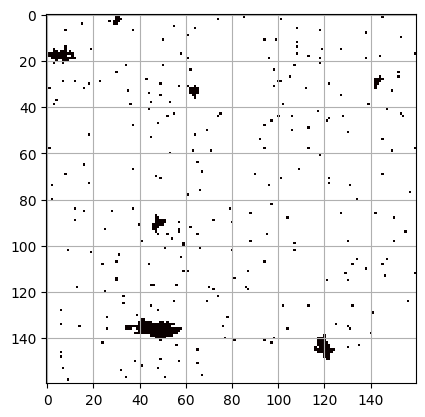

25


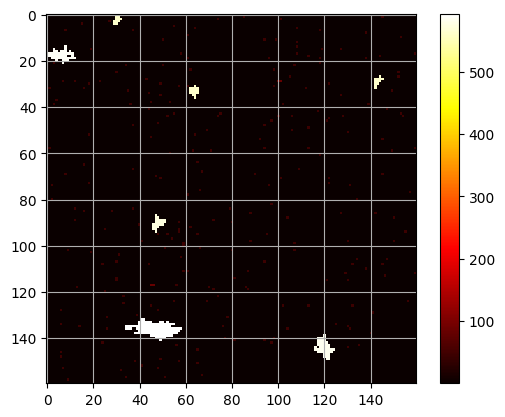

relaxation times 2.446706937787543 0.5007983803349761
0 0.0004852568363577819
10000 2.973772798877357e-07
20000 1.529852579091372e-07
30000 1.0276943283916616e-07
40000 7.775167084749576e-08
50000 6.285304419555887e-08
60000 5.294074359566163e-08
70000 4.583655226305756e-08
80000 4.047304400929516e-08
90000 3.6268524550702923e-08
100000 3.2878482978740284e-08
110000 3.0084864485117174e-08
120000 2.7742134220627017e-08
130000 2.5748959951089282e-08
140000 2.40323493525737e-08
150000 2.2538257929182165e-08
160000 2.12257551771635e-08
170000 2.0063255174609014e-08
180000 1.9025994488798225e-08
190000 1.8094292373030974e-08
200000 1.7252323982000492e-08
210000 1.6487236519492132e-08
220000 1.578849316854482e-08
230000 1.5147387811486142e-08
240000 1.4556672189978618e-08
250000 1.4010271654903607e-08
260000 1.3503062714496696e-08
270000 1.303069790287254e-08
280000 1.2589467968004956e-08
290000 1.2176190661235207e-08
300000 1.1788121834705772e-08
310000 1.1422883394418541e-08
320000 1.10784

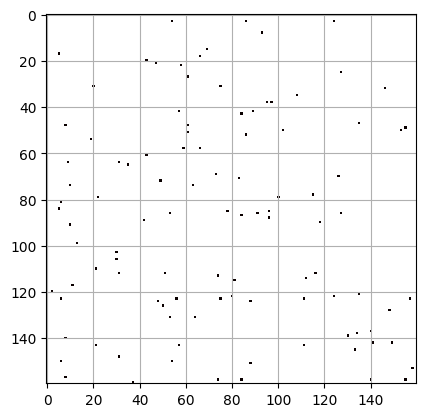

1


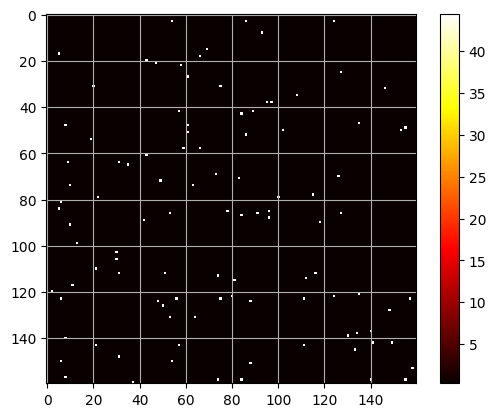

relaxation times 0.6459962781433513 0.5007983803349761
0 0.0004852568363577819
10000 1.8165246802757335e-07
20000 9.515712379833604e-08
30000 6.63546287237662e-08
40000 5.1851789700097496e-08
50000 4.293586226818509e-08
60000 3.6788829461241555e-08
70000 3.223786450856681e-08
80000 2.8707953974319844e-08
90000 2.5881162814008394e-08
100000 2.356464191712074e-08
110000 2.16327124226014e-08
120000 1.999882458752023e-08
130000 1.860081460030215e-08
140000 1.7392580239420517e-08
150000 1.633908051675963e-08
160000 1.5413168003541624e-08
170000 1.4593486413356566e-08
180000 1.3863025750321797e-08
190000 1.3208093524365222e-08
200000 1.2617567699115534e-08
210000 1.208234153436853e-08
220000 1.1594902517036444e-08
230000 1.1149011938981682e-08
240000 1.0739455343091839e-08
250000 1.0361848444405727e-08
260000 1.0012483259640224e-08
270000 9.688205512454266e-09
280000 9.386317720900474e-09
290000 9.104501761072197e-09
300000 8.840754245110107e-09
310000 8.593335590889842e-09
320000 8.36072825

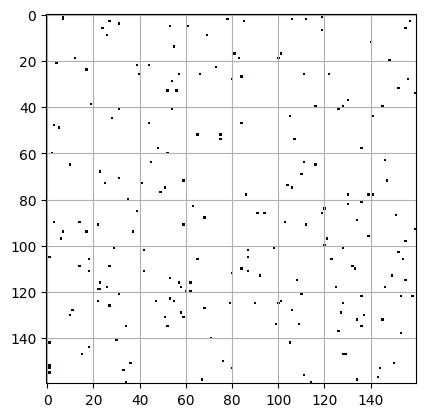

2


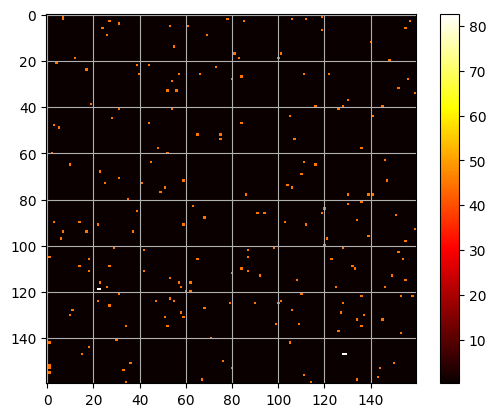

relaxation times 0.7714783157778746 0.5007983803349761
0 0.0004852568363577819
10000 2.4115656285097217e-07
20000 1.2786812452477594e-07
30000 8.939960702207717e-08
40000 6.953305907779527e-08
50000 5.7083624300801956e-08
60000 4.841775205464079e-08
70000 4.199512472757063e-08
80000 3.703675632526131e-08
90000 3.309731616297662e-08
100000 2.9899195057409254e-08
110000 2.7258205487506472e-08
120000 2.504639485023919e-08
130000 2.3171726865598592e-08
140000 2.1566176416688563e-08
150000 2.0178356557274445e-08
160000 1.896874341985674e-08
170000 1.7906470657269042e-08
180000 1.6967115334801726e-08
190000 1.6131130832017355e-08
200000 1.5382716277545246e-08
210000 1.4708984753551054e-08
220000 1.4099341187371669e-08
230000 1.3545013155447232e-08
240000 1.3038689740984743e-08
250000 1.2574241481468601e-08
260000 1.2146502249556231e-08
270000 1.17510947742189e-08
280000 1.1384292443129063e-08
290000 1.1042909032818408e-08
300000 1.0724207588687811e-08
310000 1.0425827748791923e-08
320000 1.0

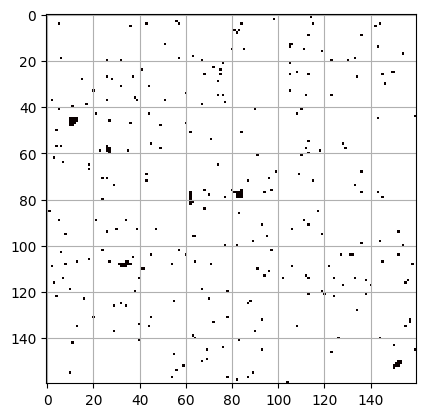

6


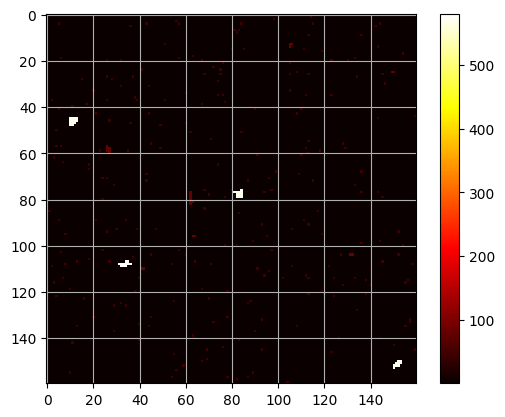

relaxation times 2.405303846680351 0.5007983803349761
0 0.0004852568363577819
10000 2.963891673133135e-07
20000 1.5714624519222765e-07
30000 1.075853045336982e-07
40000 8.160777234156309e-08
50000 6.563133011526405e-08
60000 5.485976269866273e-08
70000 4.7122312747420076e-08
80000 4.1297444242358346e-08
90000 3.6752595342943085e-08
100000 3.310640524366545e-08
110000 3.011620332831595e-08
120000 2.7620426446312435e-08
130000 2.550727005751015e-08
140000 2.369674049841982e-08
150000 2.2129934584372036e-08
160000 2.0762393543535335e-08
170000 1.9559842304401893e-08
180000 1.8495375184807162e-08
190000 1.754754084515239e-08
200000 1.6699008283584945e-08
210000 1.593561455825837e-08
220000 1.5245669417099736e-08
230000 1.4619441061362324e-08
240000 1.4048764706748328e-08
250000 1.3526744980385381e-08
260000 1.3047523860026291e-08
270000 1.2606097273542726e-08
280000 1.2198170475590647e-08
290000 1.1820041026095589e-08
300000 1.1468503195923903e-08
310000 1.1140773546398985e-08
320000 1.083

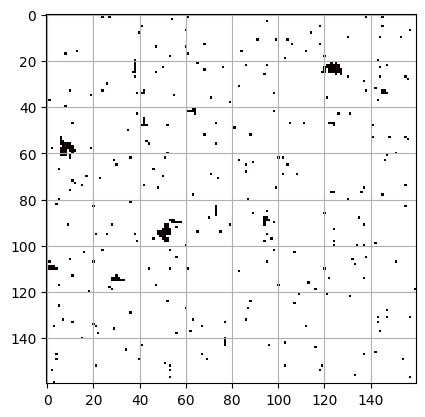

9


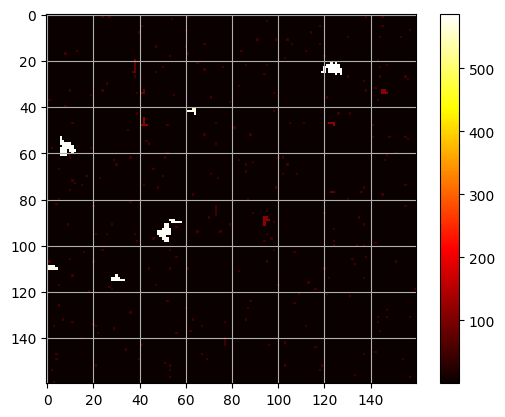

relaxation times 2.4256201391025605 0.5007983803349761
0 0.0004852568363577819
10000 3.0547430717406077e-07
20000 1.5646418845917678e-07
30000 1.0452439260530971e-07
40000 7.829399799296444e-08
50000 6.251695150222709e-08
60000 5.201516105407889e-08
70000 4.4552748025955956e-08
80000 3.9003049454362364e-08
90000 3.4732893924062844e-08
100000 3.1357095881558984e-08
110000 2.8627369000120468e-08
120000 2.637667878023893e-08
130000 2.4488952300859363e-08
140000 2.288146032461479e-08
150000 2.149400641552067e-08
160000 2.028201712348801e-08
170000 1.921197521034545e-08
180000 1.8258324235767225e-08
190000 1.7401323289016342e-08
200000 1.6625536298837823e-08
210000 1.5918750192752966e-08
220000 1.5271192577884337e-08
230000 1.467495865813792e-08
240000 1.4123585311489479e-08
250000 1.3611734875019817e-08
260000 1.3134956507657511e-08
270000 1.2689502000943035e-08
280000 1.2272190007938519e-08
290000 1.1880295261553392e-08
300000 1.151146579744983e-08
310000 1.1163657117187221e-08
320000 1.0

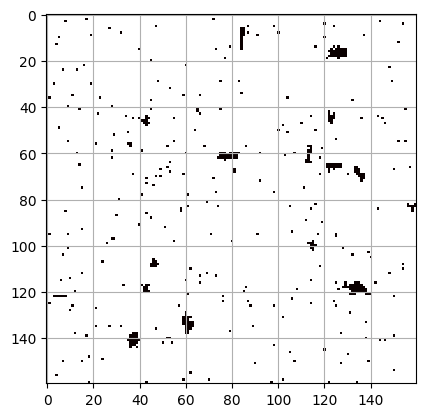

13


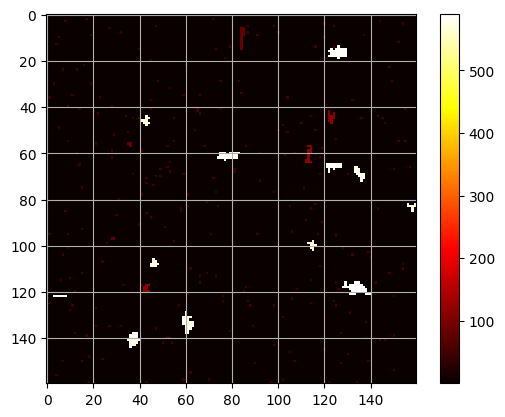

relaxation times 2.4383558680816297 0.5007983803349761
0 0.0004852568363577819
10000 2.8397812113999485e-07
20000 1.4670563053091054e-07
30000 1.0007878235820143e-07
40000 7.633038706629148e-08
50000 6.196234586227143e-08
60000 5.2358047788673995e-08
70000 4.5489925452734774e-08
80000 4.03278422564151e-08
90000 3.629653538506395e-08
100000 3.305241125552611e-08
110000 3.037913085619347e-08
120000 2.8134243064715984e-08
130000 2.6220167263258554e-08
140000 2.4567665616133127e-08
150000 2.3126064254631877e-08
160000 2.1857266955128493e-08
170000 2.0731967987118653e-08
180000 1.97271849027643e-08
190000 1.8824595383058853e-08
200000 1.8009392829010986e-08
210000 1.7269469153386312e-08
220000 1.6594824972199023e-08
230000 1.5977128795245832e-08
240000 1.5409386602579966e-08
250000 1.488568739081691e-08
260000 1.4401003079000135e-08
270000 1.395103367322935e-08
280000 1.3532083669736881e-08
290000 1.3140960154036443e-08
300000 1.277489337276483e-08
310000 1.243146912006107e-08
320000 1.2108

In [92]:
conds2k=[[[] for i in range(5)], [[] for i in range(5)]]
grids2k=[[[] for i in range(5)], [[] for i in range(5)]]
temps2k=[[[] for i in range(5)], [[] for i in range(5)]]
for [gamma, wtMap] in gammaMapping.items():
    for [wt, mapping] in wtMap.items():
        grid=generateHybridSample2(rows=160, cols=160, coreProbs=[0.0005, 0.005], growthProbs=[0.1, 0.1], wts=[wt, 0], densities=[2260, 2200], absorptionRates=[1, 1], nonGrowthDensity=914)
        cond, T, distF=lbm(grid=grid, ks=[0.305, 2200], rhos=[914, 700], cps=[2140, 2229], dt=1e-7)
        conds2k[gamma==0.01][wt-1].extend(cond)
        grids2k[gamma==0.01][wt-1].append(grid)
        temps2k[gamma==0.01][wt-1].append(T)

In [93]:
print(conds2k[0][0])

[np.float64(0.3060906551168604), np.float64(0.3067809632727483), np.float64(0.30615278858511263), np.float64(0.30713118823625823), np.float64(0.31172003851255026), np.float64(0.3125322204910963), np.float64(0.3111409187660811), np.float64(0.31151549030757847), np.float64(0.31183546582438765), np.float64(0.31066762821553373), np.float64(0.3089262722220241), np.float64(0.307096205582263), np.float64(0.30685997736314274), np.float64(0.30608138745426594), np.float64(0.30509201108074546), np.float64(0.3050549960579036), np.float64(0.3050812333840258), np.float64(0.30605506708191893), np.float64(0.3078423676022855), np.float64(0.3098359091845223), np.float64(0.3106059810069449), np.float64(0.30888483129403915), np.float64(0.30610619606041434), np.float64(0.30504417463489847), np.float64(0.3050276074182708), np.float64(0.30502080820383043), np.float64(0.3050143441370005), np.float64(0.3050339567142172), np.float64(0.30690058282236526), np.float64(0.3113024423752854), np.float64(0.312325261659

0.307509399205453


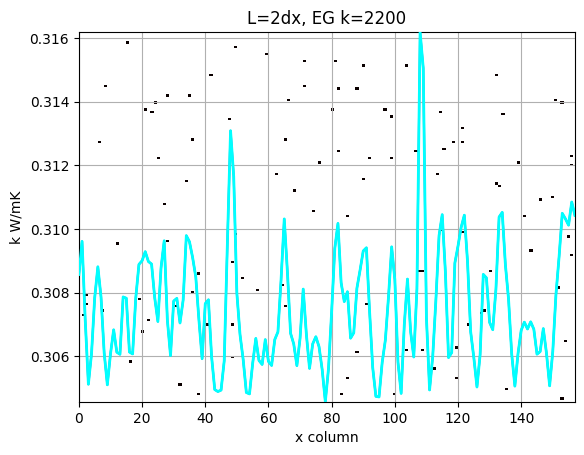

0.31007168620859576


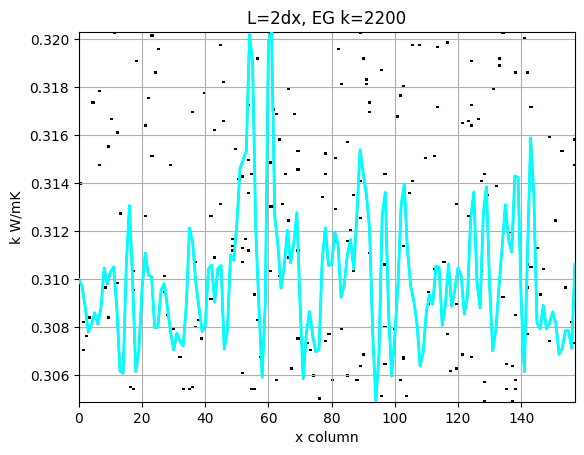

0.39066629641168293


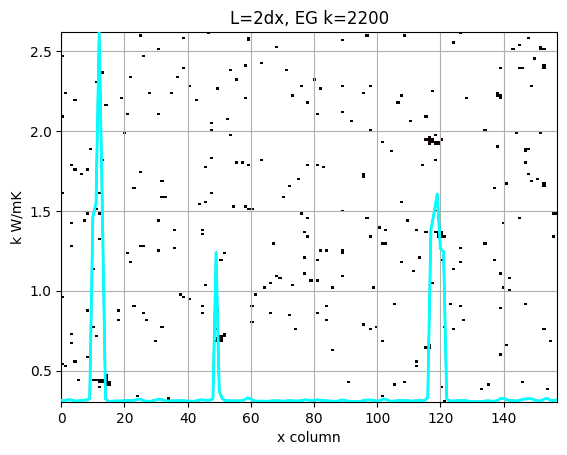

1.233758044748793


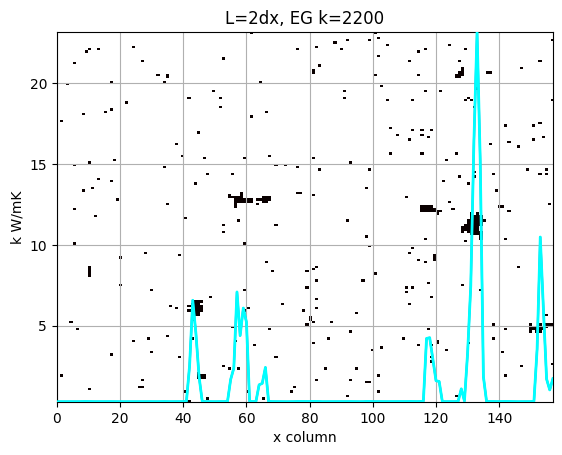

2.247581260371194


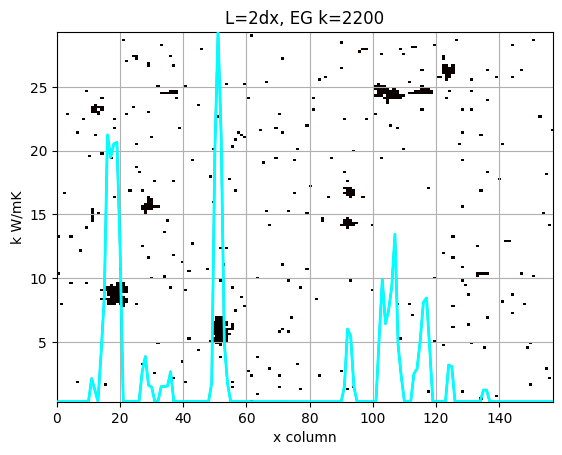




HIGH GAMMA Ks
0.3073920272348695


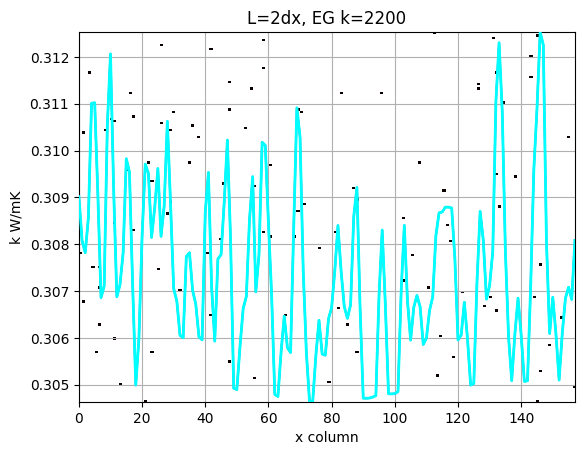

0.3100245180025362


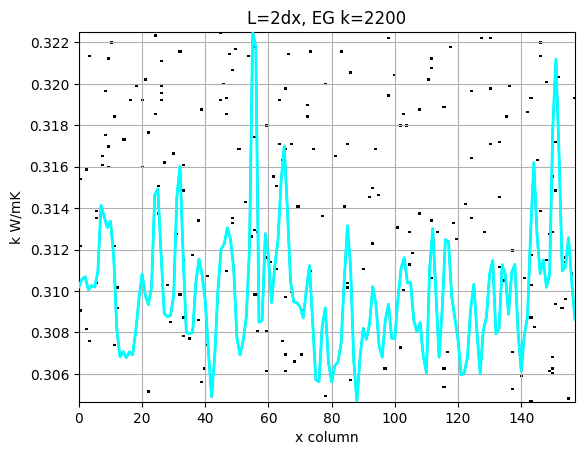

0.4298909672701265


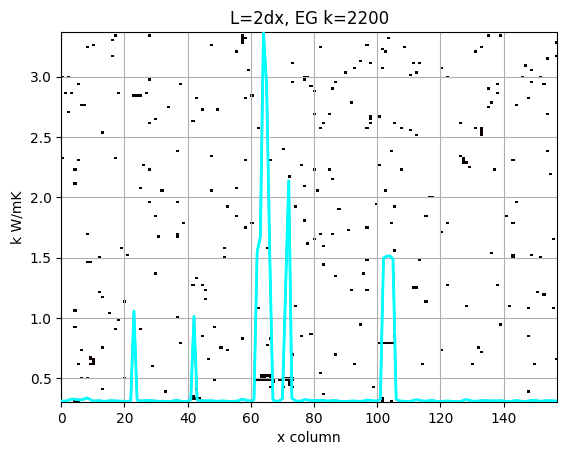

0.8164847091466759


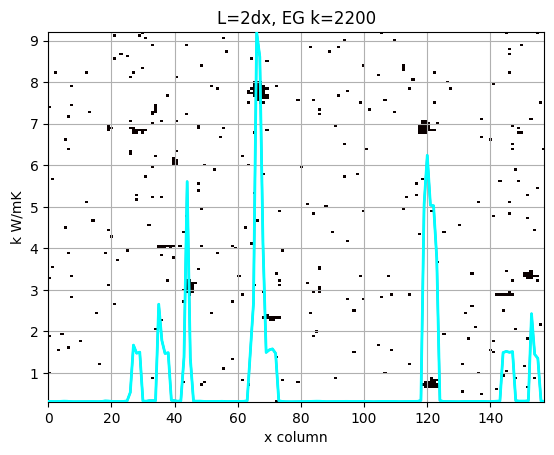

1.695858462119883


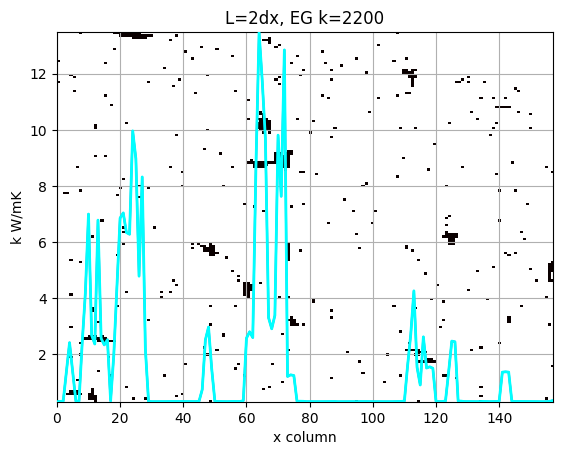

In [54]:
low_gamma_conds=[]
high_gamma_conds=[]
for wt in range(5):
    pixelSize=1e-3/160
    fig, ax = plt.subplots()
    conds=conds2k[0][wt]
    plt.plot(range(158), conds)
    plt.ylabel('k W/mK')
    plt.xlabel('x column')
    plt.title('L=2dx, EG k=2200')
    ax.imshow(grids2k[0][wt][0], cmap='hot', interpolation='nearest', extent=[0, 157, np.min(conds), np.max(conds)], aspect='auto')
    ax.plot(range(158), conds, color='cyan', linewidth=2, zorder=10)

    # Compute the number of zeros in each column of the grid
    grid=np.array(grids2k[0][wt][0], dtype=np.float32)
    zeros_count=np.sum(grid==0, axis=0)
    
    # Create a secondary y-axis for the zeros count
    # ax2 = ax.twinx()
    # ax2.plot(range(158), zeros_count, color='orange', linewidth=2, zorder=10)
    # ax2.set_ylabel('Count of 0s')
    
    ax.grid(True)
    print(np.mean(conds))
    low_gamma_conds.append(np.mean(conds))
    plt.pause(0.1)
print('\n\n\nHIGH GAMMA Ks')
for wt in range(5):
    pixelSize=1e-3/160
    fig, ax = plt.subplots()
    conds=conds2k[1][wt]
    plt.plot(range(158), conds)
    plt.ylabel('k W/mK')
    plt.xlabel('x column')
    plt.title('L=2dx, EG k=2200')
    ax.imshow(grids2k[1][wt][0], cmap='hot', interpolation='nearest', extent=[0, 157, np.min(conds), np.max(conds)], aspect='auto')
    ax.plot(range(158), conds, color='cyan', linewidth=2, zorder=10)

    # Compute the number of zeros in each column of the grid
    grid=np.array(grids2k[1][wt][0], dtype=np.float32)
    zeros_count=np.sum(grid==0, axis=0)
    
    # Create a secondary y-axis for the zeros count
    # ax2 = ax.twinx()
    # ax2.plot(range(158), zeros_count, color='orange', linewidth=2, zorder=10)
    # ax2.set_ylabel('Count of 0s')
    
    ax.grid(True)
    print(np.mean(conds))
    high_gamma_conds.append(np.mean(conds))
    plt.pause(0.1)

0.3073863081032686


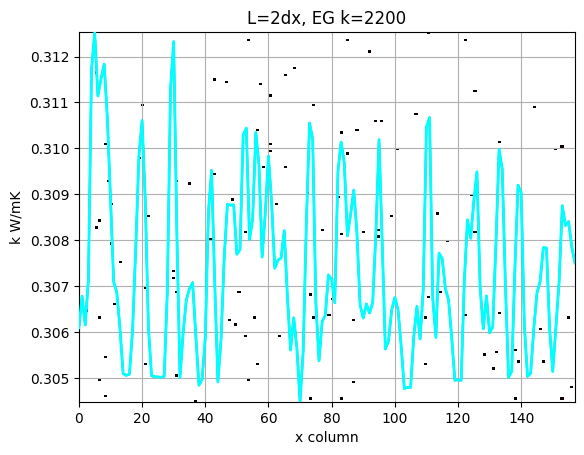

0.3100140607333883


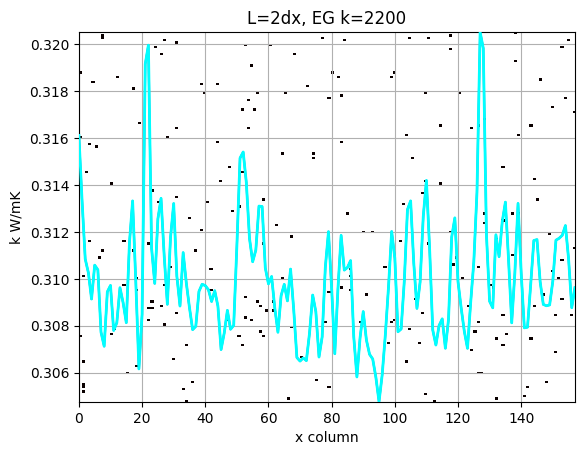

0.5095859520768183


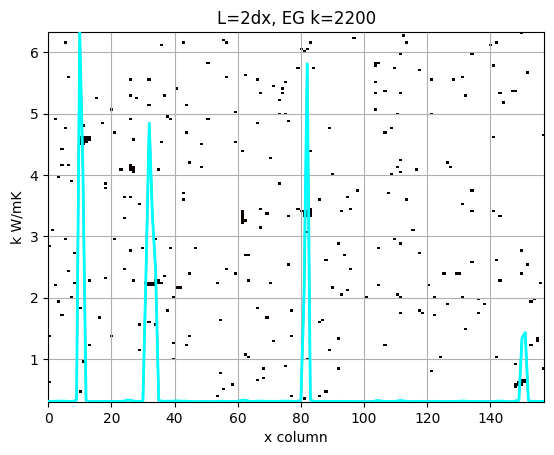

1.2257401348996917


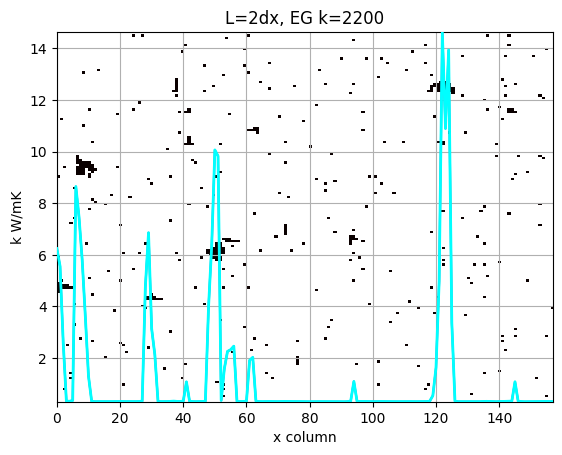

2.1896551986427646


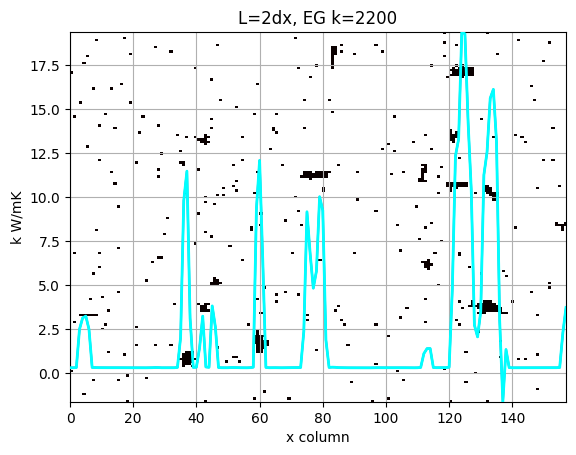




HIGH GAMMA Ks
0.30736863519398844


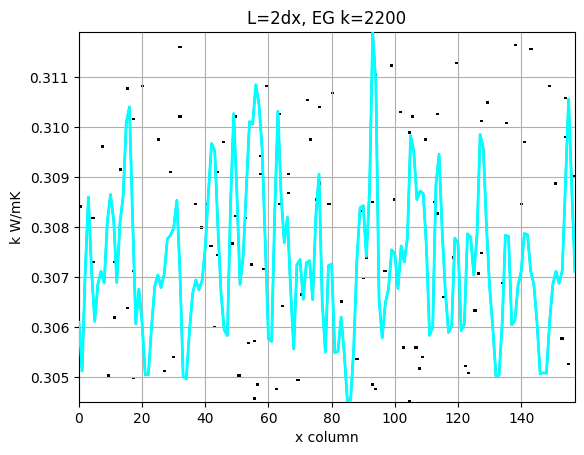

0.3103107428643277


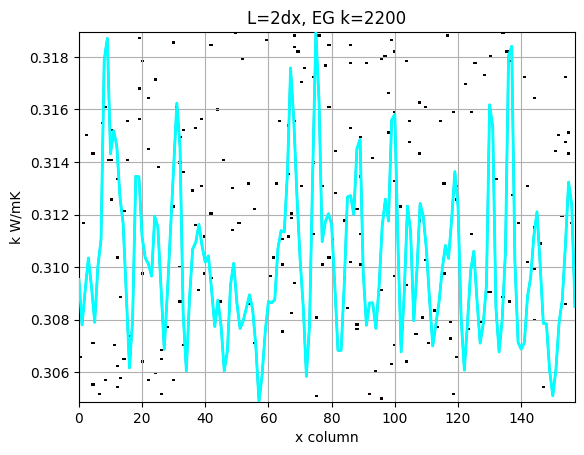

0.3498480604419495


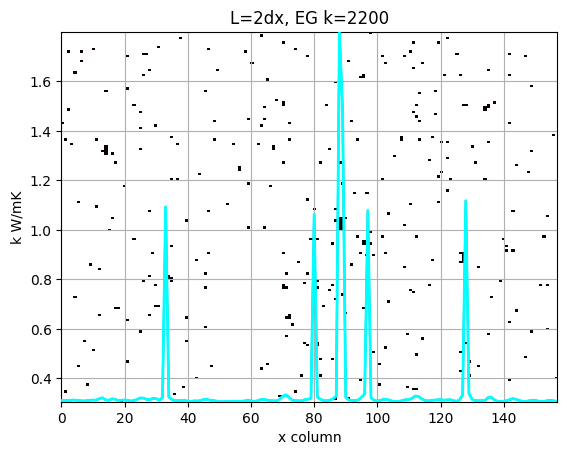

1.4670748199302988


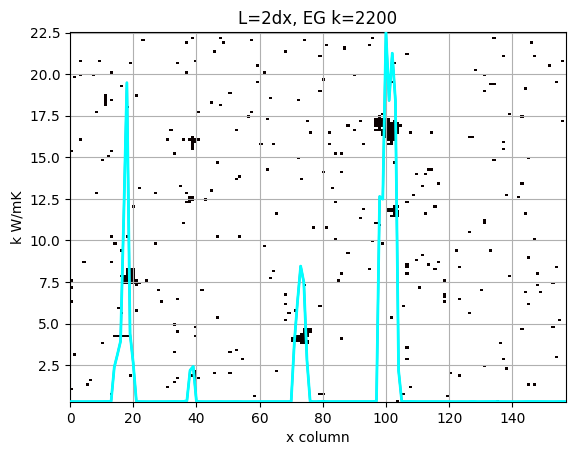

3.38062006037892


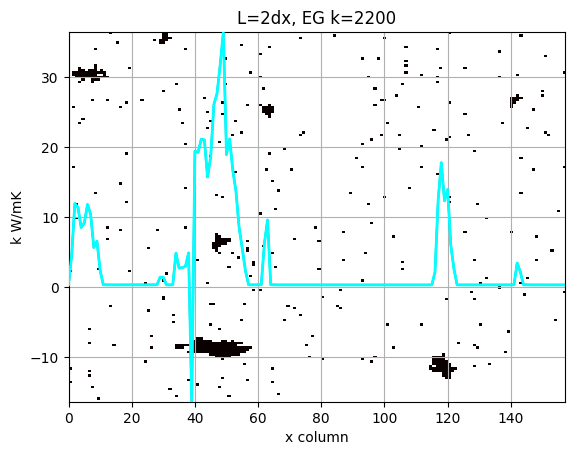

In [94]:
low_gamma_conds3=[]
high_gamma_conds3=[]
for wt in range(5):
    pixelSize=1e-3/160
    fig, ax = plt.subplots()
    conds=conds2k[0][wt]
    plt.plot(range(158), conds)
    plt.ylabel('k W/mK')
    plt.xlabel('x column')
    plt.title('L=2dx, EG k=2200')
    ax.imshow(grids2k[0][wt][0], cmap='hot', interpolation='nearest', extent=[0, 157, np.min(conds), np.max(conds)], aspect='auto')
    ax.plot(range(158), conds, color='cyan', linewidth=2, zorder=10)

    # Compute the number of zeros in each column of the grid
    grid=np.array(grids2k[0][wt][0], dtype=np.float32)
    zeros_count=np.sum(grid==0, axis=0)
    
    # Create a secondary y-axis for the zeros count
    # ax2 = ax.twinx()
    # ax2.plot(range(158), zeros_count, color='orange', linewidth=2, zorder=10)
    # ax2.set_ylabel('Count of 0s')
    
    ax.grid(True)
    print(np.mean(conds))
    low_gamma_conds3.append(np.mean(conds))
    plt.pause(0.1)
print('\n\n\nHIGH GAMMA Ks')
for wt in range(5):
    pixelSize=1e-3/160
    fig, ax = plt.subplots()
    conds=conds2k[1][wt]
    plt.plot(range(158), conds)
    plt.ylabel('k W/mK')
    plt.xlabel('x column')
    plt.title('L=2dx, EG k=2200')
    ax.imshow(grids2k[1][wt][0], cmap='hot', interpolation='nearest', extent=[0, 157, np.min(conds), np.max(conds)], aspect='auto')
    ax.plot(range(158), conds, color='cyan', linewidth=2, zorder=10)

    # Compute the number of zeros in each column of the grid
    grid=np.array(grids2k[1][wt][0], dtype=np.float32)
    zeros_count=np.sum(grid==0, axis=0)
    
    # Create a secondary y-axis for the zeros count
    # ax2 = ax.twinx()
    # ax2.plot(range(158), zeros_count, color='orange', linewidth=2, zorder=10)
    # ax2.set_ylabel('Count of 0s')
    
    ax.grid(True)
    print(np.mean(conds))
    high_gamma_conds3.append(np.mean(conds))
    plt.pause(0.1)

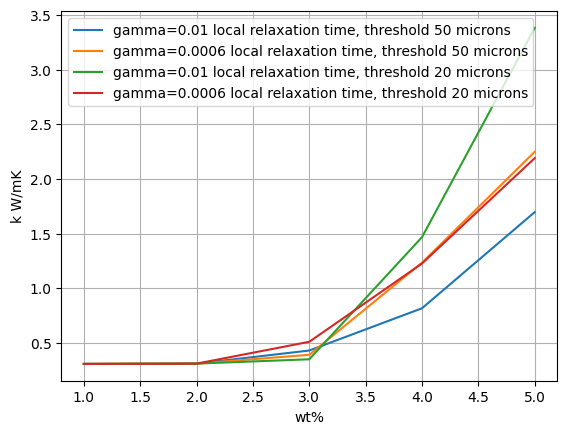

In [98]:
plt.plot(range(1,6), high_gamma_conds, label='gamma=0.01 local relaxation time, threshold 50 microns')
plt.plot(range(1,6), low_gamma_conds, label='gamma=0.0006 local relaxation time, threshold 50 microns')
plt.plot(range(1,6), high_gamma_conds3, label='gamma=0.01 local relaxation time, threshold 20 microns')
plt.plot(range(1,6), low_gamma_conds3, label='gamma=0.0006 local relaxation time, threshold 20 microns')
# plt.plot(range(1,6), high_gamma_conds2, label='gamma=0.01 global relaxation time, threshold 20 microns')
# plt.plot(range(1,6), low_gamma_conds2, label='gamma=0.0006 global relaxation time, threshold 20 microns')

# plt.title('rho_matrix = 914 kg/m^3 rho_filler = 2200 kg/m^3 k0 = 0.254 W/mK k3_bulk = 3 W/mK Rbd = 8.33e-08 m^2K/W RbdFF = 1.28e-09 m^2K/W d = 1e-09 m k_int = 0.012 W/mK k_cont = 0.7813 W/mK h = 1e-09 m fillerThickness = 1.4e-09 m c1_prime (fixed) = 9e-07')
plt.xlabel('wt%')
plt.ylabel('k W/mK')
plt.legend()
plt.grid()

1.7268312830454862


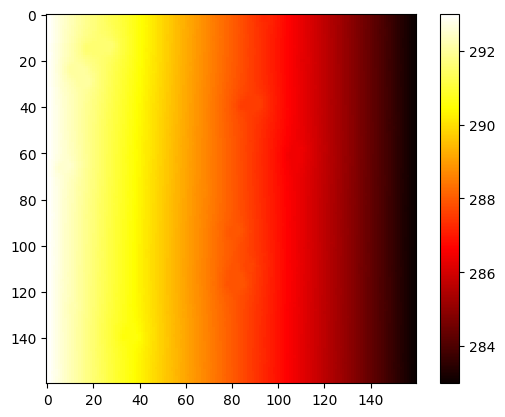

In [20]:
cond, plt.imshow(T, cmap='hot', interpolation='nearest')
plt.colorbar()
print(sum(cond)/len(cond))

In [21]:
if type(grid) is list:
    grid=np.array(grid)
rows, cols=grid.shape
ks=[0.305, 120]
rhos=[914, 700]
cps=[2140, 2229]
dt=3.2e-7
tHot=293
tCold=283
width=1e-3
length=1e-3
dirs=[[1,0],[0,1],[-1,0],[0,-1]]

# calculate thermal diffusivities in lattice units
dx=width/cols
thermalDiffusivities=[tc/(rho*cp) for tc, rho, cp in zip(ks, rhos, cps)]
lbThermalDiffusivities=[td*dt/(dx)**2 for td in thermalDiffusivities]

tauMap=np.where(grid==1, 2*lbThermalDiffusivities[0]+0.5, 2*lbThermalDiffusivities[1]+0.5)
heatCapMap=np.where(grid==1, rhos[0]*cps[0], rhos[1]*cps[1])

In [130]:
conds=[2*dx*np.sum((distF[1,:,i]-distF[3,:,i])/(T[:,i-1]-T[:,i+1])*heatCapMap[:,i]*(tauMap[:,i]-0.5)/tauMap[:,i])*(dx/dt)/rows for i in range(1, cols-1)]

In [131]:
conds

[np.float64(0.31300135547305463),
 np.float64(0.31322176060623097),
 np.float64(0.3098523838113119),
 np.float64(0.30811796364167987),
 np.float64(0.3086328030838076),
 np.float64(0.30704735475521594),
 np.float64(0.30615658388774386),
 np.float64(0.30780201063124013),
 np.float64(0.30895546090902143),
 np.float64(0.30774714843767986),
 np.float64(0.30821667778147527),
 np.float64(0.3108648449382844),
 np.float64(0.31541987682321965),
 np.float64(0.33343151957905015),
 np.float64(1.6538455394506932),
 np.float64(2.2839526447201806),
 np.float64(2.1869758786619653),
 np.float64(2.432591082406911),
 np.float64(2.410832503680287),
 np.float64(1.691376505283704),
 np.float64(1.606762331869382),
 np.float64(1.7160252043274675),
 np.float64(1.7113568731884723),
 np.float64(1.057443153378651),
 np.float64(0.8481675828418043),
 np.float64(0.32240124588078667),
 np.float64(0.31328182392605475),
 np.float64(0.3248298362117244),
 np.float64(1.5028038503049697),
 np.float64(2.9557580494725633),
 n

2.1720931249256763


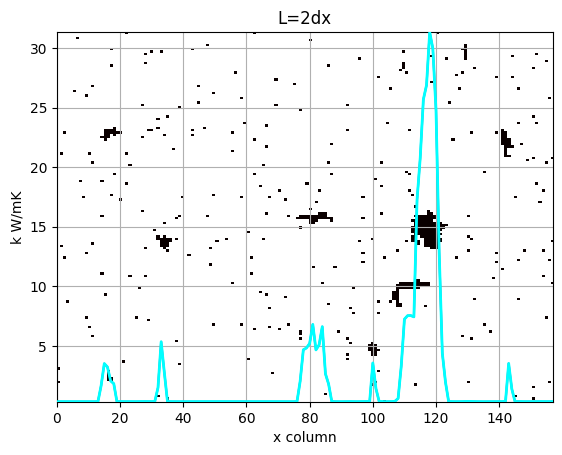

In [40]:
fig, ax = plt.subplots()
plt.plot(range(158), cond)
plt.ylabel('k W/mK')
plt.xlabel('x column')
plt.title('L=2dx')
ax.imshow(grid, cmap='hot', interpolation='nearest', extent=[0, 157, np.min(cond), np.max(cond)], aspect='auto')
ax.plot(range(158), cond, color='cyan', linewidth=2, zorder=10)
ax.grid(True)
print(sum(cond)/len(cond))

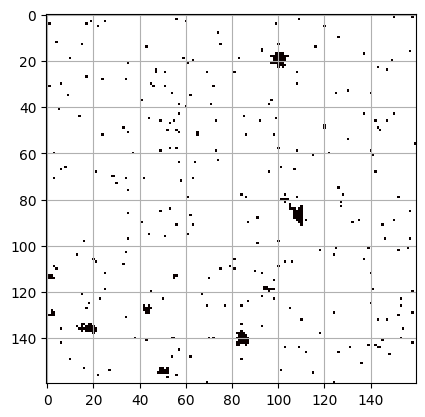

In [69]:
plt.imshow(grid, cmap='hot', interpolation='nearest')
plt.grid()

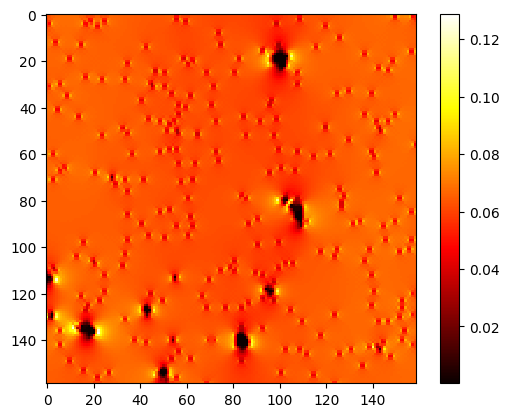

In [70]:
dT=np.sqrt((((T[:,:-1]-T[:,1:])**2)[:-1,:]+((T[:-1,:]-T[1:,:])**2)[:,:-1]))
plt.imshow(dT, cmap='hot', interpolation='nearest')
plt.colorbar()

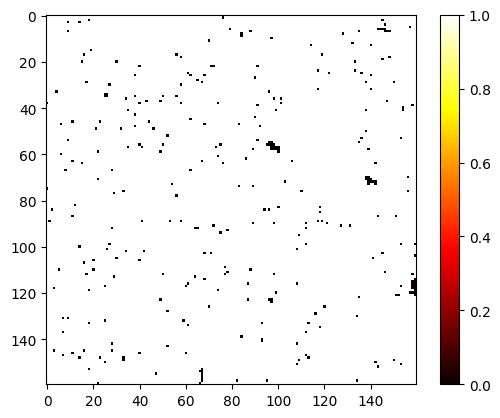

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [21]:
def lbmQ9(grid, paraffinRelaxationTime=0.59567, saturatedEGRelaxationTime=1.2764):
    if type(grid) is list:
        grid=np.array(grid)
    rows, cols=grid.shape

    plt.imshow(grid, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.show()
    plt.pause(0.01)

    tHot=293
    tCold=283
    parRelaxTime=paraffinRelaxationTime
    satEGRelaxTime=saturatedEGRelaxationTime
    dirs=[[1,0],[0,1],[-1,0],[0,-1],[1,1],[1,-1],[-1,1],[-1,-1]]
    T=np.full((rows, cols), (tHot+tCold)/2)
    tauMap=np.where(grid==1, parRelaxTime, satEGRelaxTime)
    heatCapMap=np.where(grid==1, 2140*914, 700*2229)
    T[:,0]=tHot
    T[:,-1]=tCold
    # omega=0.25/(1+1/np.sqrt(2))
    omegas=np.array([1/6, 1/6, 1/6, 1/6, 1/12, 1/12, 1/12, 1/12])
    # omegas=np.array([omega, omega, omega, omega, omega/np.sqrt(2), omega/np.sqrt(2), omega/np.sqrt(2), omega/np.sqrt(2)])
    distF=np.zeros((8, rows, cols))
    distF[:,:,:]=T[:,:]
    distF*=omegas[:,None,None]
    tolerance=1e-8
    for i in range(10000000):
        T_old=T.copy()

        T=np.sum(distF, axis=0)

        # collision
        for dir in range(8):
            distF[dir]-=(distF[dir]-T*omegas[dir])/tauMap
        
        # streaming step
        for dir, [x,y] in enumerate(dirs):
            distF[dir]=shift(distF[dir], x, y)

        # top/bottom neumann boundary conditions
        for [dir1, dir2] in [[0,2],[4,7],[5,6]]:
            distF[dir1,0,:]=distF[dir2,0,:]
            distF[dir2,-1,:]=distF[dir1,-1,:]

        # reset left/right boundary conditions
        for [dir1, dir2] in [[1,3],[4,7],[6,5]]:
            distF[dir1,:,0]=tHot*omegas[dir1]+(tHot*omegas[dir2]-distF[dir2,:,0])
            distF[dir2,:,-1]=tCold*omegas[dir2]+(tCold*omegas[dir1]-distF[dir1,:,-1])

        # update temp
        T=np.sum(distF, axis=0)

        # verify how much temp changed 
        error=np.sqrt(np.sum(np.square((T-T_old)))/np.sum(np.square(T)))
        if i%10000==0:
            print(i, error)
            print('temps')
            plt.imshow(T, cmap='hot', interpolation='nearest')
            plt.colorbar()
            plt.pause(0.01)
        if error<tolerance:
            print("CONVERGED ON STEP", i, "WITH ERROR", error)
            break
    # Calculate thermal conductivity
    deltaT=tHot-tCold
    velocity=2.4e7
    qFlux=np.sum(velocity*(distF[1]+distF[4]+distF[6]+distF[0]-distF[3]-distF[5]-distF[7]-distF[2])*heatCapMap*(tauMap-0.5)/tauMap)
    cond=1e-3*qFlux/(deltaT*rows*cols)
    # deltaT=tHot-tCold
    # qFlux=(velocity*(np.sum(distF[1])+np.sum(distF[0])-np.sum(distF[2])-np.sum(distF[3]))+velocity*(-np.sum(distF[5])-np.sum(distF[7])+np.sum(distF[4])+np.sum(distF[6])))*(np.mean(tauMap)-0.5)/np.mean(tauMap)
    # cond=2e-4*qFlux/(deltaT*rows*cols)
    return cond, T
# condQ9, TQ9=lbmQ9(grid, 0.59567, 113.69)
# condQ9, TQ9=lbmQ9(grid, 1, 0.505)
condQ9, TQ9=lbmQ9(grid, 0.50305, 1.7)

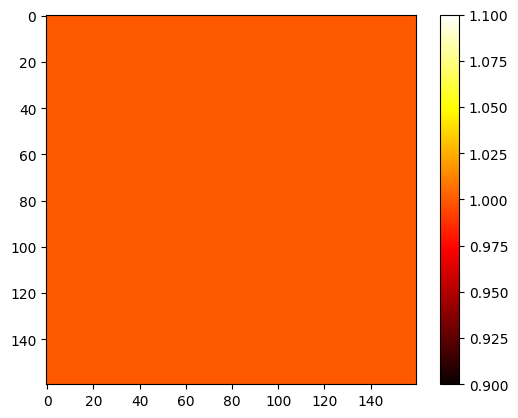

relaxation times 0.5023951410049285 1.681311286291098
iteration, error:  0 2.1779897261883265e-16
energy: 7372799.999999999
num of tHot left boundary: 160
num of tCold right boundary 160
num of unequal opposite velos on top boundary: 4
num of unequal opposite velos on bottom boundary: 4
temps


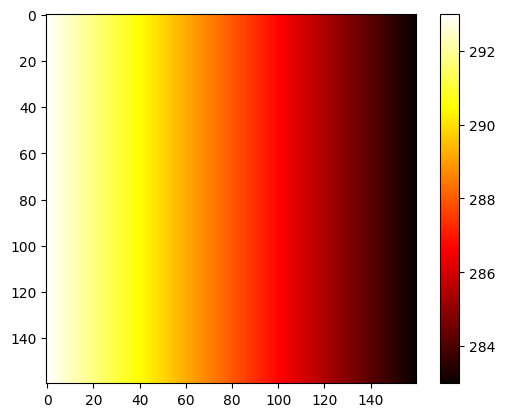

iteration, error:  10000 4.835036903910158e-09
energy: 7372799.999993157
num of tHot left boundary: 160
num of tCold right boundary 160
num of unequal opposite velos on top boundary: 4
num of unequal opposite velos on bottom boundary: 4
temps


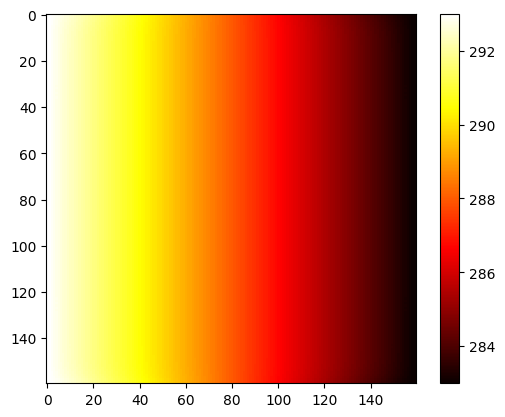

iteration, error:  20000 3.4613362324281605e-09
energy: 7372799.999986578
num of tHot left boundary: 160
num of tCold right boundary 160
num of unequal opposite velos on top boundary: 4
num of unequal opposite velos on bottom boundary: 4
temps


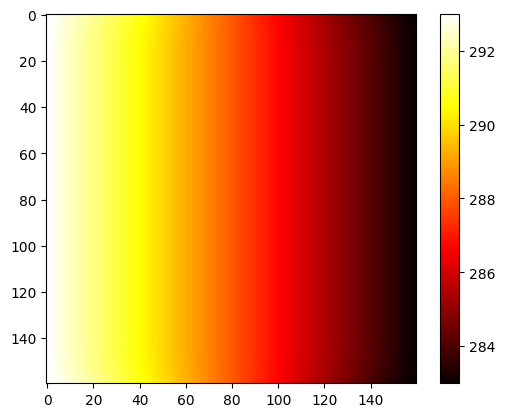

iteration, error:  30000 2.7971630744834774e-09
energy: 7372799.99998018
num of tHot left boundary: 160
num of tCold right boundary 160
num of unequal opposite velos on top boundary: 4
num of unequal opposite velos on bottom boundary: 4
temps


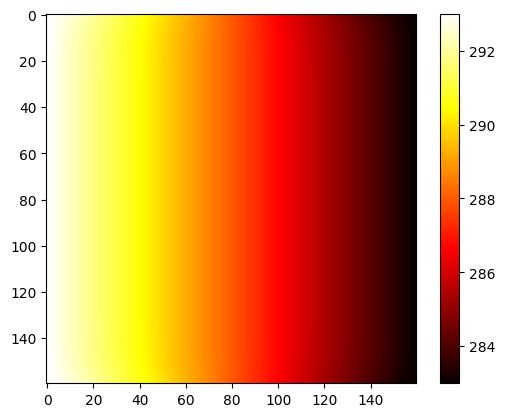

iteration, error:  40000 2.378972725444008e-09
energy: 7372799.999973926
num of tHot left boundary: 160
num of tCold right boundary 160
num of unequal opposite velos on top boundary: 4
num of unequal opposite velos on bottom boundary: 4
temps


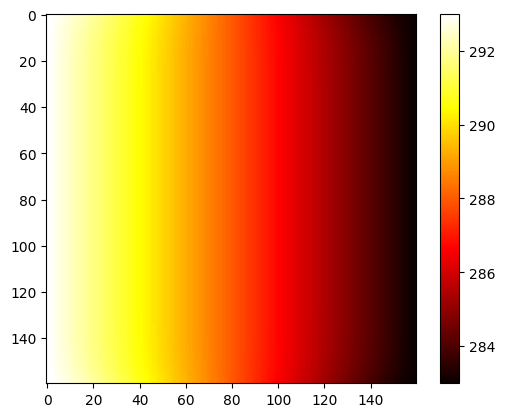

iteration, error:  50000 2.0821757700312318e-09
energy: 7372799.9999678
num of tHot left boundary: 160
num of tCold right boundary 160
num of unequal opposite velos on top boundary: 4
num of unequal opposite velos on bottom boundary: 4
temps


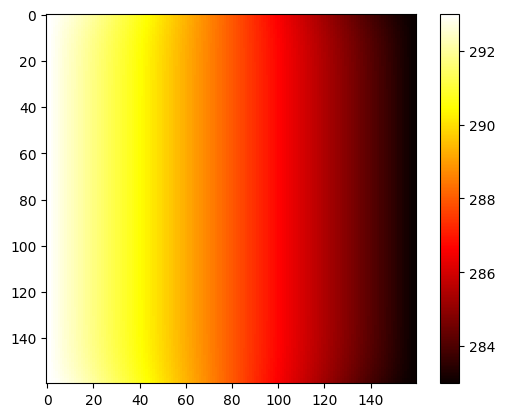

iteration, error:  60000 1.8564376917542812e-09
energy: 7372799.999961787
num of tHot left boundary: 160
num of tCold right boundary 160
num of unequal opposite velos on top boundary: 4
num of unequal opposite velos on bottom boundary: 4
temps


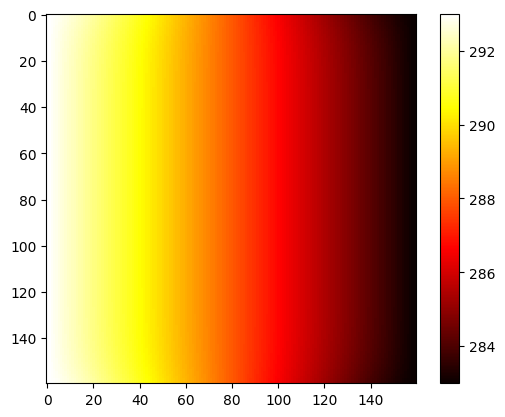

iteration, error:  70000 1.6767980384455434e-09
energy: 7372799.999955881
num of tHot left boundary: 160
num of tCold right boundary 160
num of unequal opposite velos on top boundary: 4
num of unequal opposite velos on bottom boundary: 4
temps


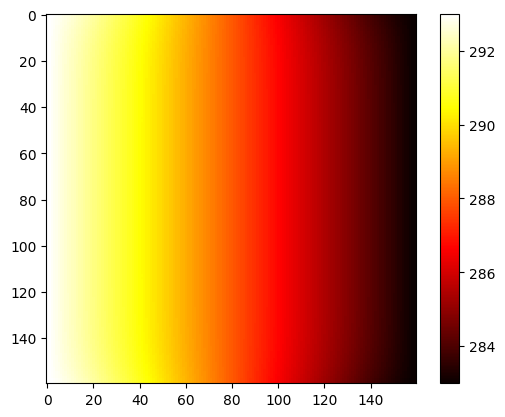

iteration, error:  80000 1.5292064963075922e-09
energy: 7372799.999950072
num of tHot left boundary: 160
num of tCold right boundary 160
num of unequal opposite velos on top boundary: 4
num of unequal opposite velos on bottom boundary: 4
temps


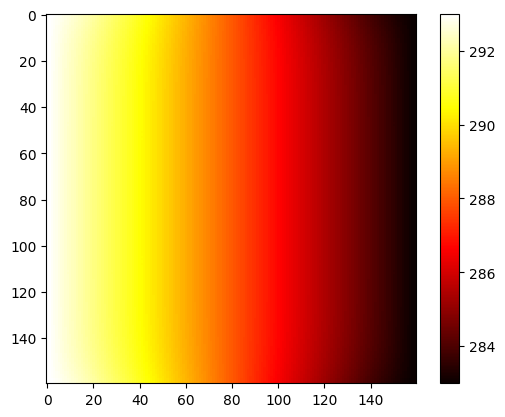

iteration, error:  90000 1.4050352951042318e-09
energy: 7372799.999944351
num of tHot left boundary: 160
num of tCold right boundary 160
num of unequal opposite velos on top boundary: 4
num of unequal opposite velos on bottom boundary: 4
temps


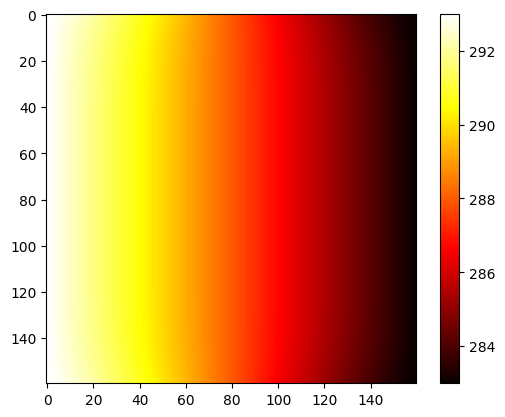

iteration, error:  100000 1.2986380217191833e-09
energy: 7372799.999938715
num of tHot left boundary: 160
num of tCold right boundary 160
num of unequal opposite velos on top boundary: 4
num of unequal opposite velos on bottom boundary: 4
temps


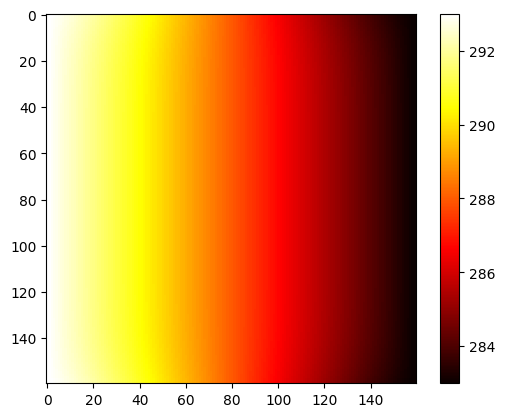

iteration, error:  110000 1.206134724395405e-09
energy: 7372799.999933165
num of tHot left boundary: 160
num of tCold right boundary 160
num of unequal opposite velos on top boundary: 4
num of unequal opposite velos on bottom boundary: 4
temps


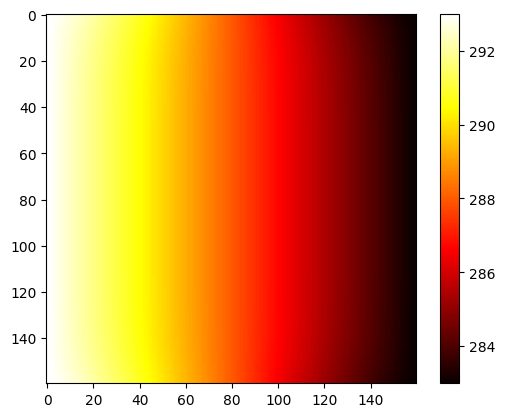

iteration, error:  120000 1.1247543837283474e-09
energy: 7372799.999927688
num of tHot left boundary: 160
num of tCold right boundary 160
num of unequal opposite velos on top boundary: 4
num of unequal opposite velos on bottom boundary: 4
temps


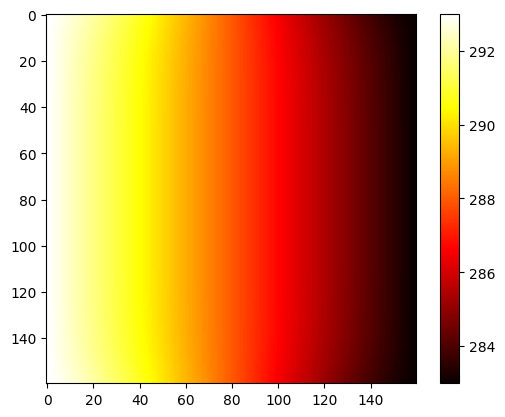

iteration, error:  130000 1.0524550172818577e-09
energy: 7372799.9999222895
num of tHot left boundary: 160
num of tCold right boundary 160
num of unequal opposite velos on top boundary: 4
num of unequal opposite velos on bottom boundary: 4
temps


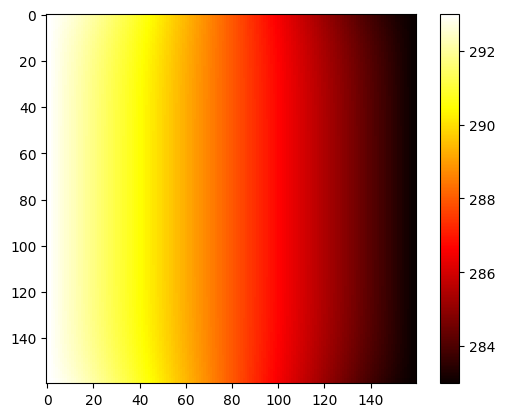

CONVERGED ON STEP 138017 WITH ERROR 9.999968536289037e-10


In [30]:
def lbmQ9Material(grid, lambdas, rhos, cps, deltaT, length=1e-3, width=1e-3, tHot=293, tCold=283):
    if type(grid) is list:
        grid=np.array(grid)
    rows, cols=grid.shape
    grid[:,:]=1

    plt.imshow(grid, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.show()
    plt.pause(0.01)

    deltaX=width/cols
    thermalDiffusivities=[tc/(rho*cp) for tc, rho, cp in zip(lambdas, rhos, cps)]
    lbThermalDiffusivities=[td*deltaT/(deltaX)**2 for td in thermalDiffusivities]
    
    dirs=[[1,0],[0,1],[-1,0],[0,-1],[1,1],[1,-1],[-1,1],[-1,-1]]
    T=np.full((rows, cols), (tHot+tCold)/2)
    for i, temp in enumerate(np.linspace(tHot, tCold, cols)):
        T[:,i]=temp
    tauMap=np.where(grid==1, 3*lbThermalDiffusivities[0]+0.5, 3*lbThermalDiffusivities[1]+0.5)
    print('relaxation times', 3*lbThermalDiffusivities[0]+0.5, 3*lbThermalDiffusivities[1]+0.5)
    kMap=np.where(grid==1, lambdas[0], lambdas[1])
    T[:,0]=tHot
    T[:,-1]=tCold
    omegas=np.array([1/6, 1/6, 1/6, 1/6, 1/12, 1/12, 1/12, 1/12])
    distF=np.zeros((8, rows, cols))
    distF[:,:,:]=T[:,:]
    distF*=omegas[:,None,None]
    tolerance=1e-9
    for i in range(100000000):
        T_old=T.copy()

        T=np.sum(distF, axis=0)

        # collision
        for dir in range(8):
            distF[dir,:,1:-1]-=(distF[dir,:,1:-1]-T[:,1:-1]*omegas[dir])/tauMap[:,1:-1]
        
        # streaming step
        for dir, [x,y] in enumerate(dirs):
            distF[dir]=shift(distF[dir], x, y)

        # top/bottom neumann boundary conditions
        for [dir1, dir2] in [[0,2],[4,7],[5,6]]:
            distF[dir1,0,:]=distF[dir2,0,:]
            distF[dir2,-1,:]=distF[dir1,-1,:]

        # reset left/right boundary conditions
        for [dir1, dir2] in [[1,3],[4,7],[6,5]]:
            distF[dir1,:,0]=tHot*omegas[dir1]+(tHot*omegas[dir2]-distF[dir2,:,0])
            distF[dir2,:,-1]=tCold*omegas[dir2]+(tCold*omegas[dir1]-distF[dir1,:,-1])

        distF[0,:,0]=tHot*omegas[0]
        distF[2,:,0]=tHot*omegas[2]
        distF[0,:,-1]=tCold*omegas[0]
        distF[2,:,-1]=tCold*omegas[2]

        # update temp
        T=np.sum(distF, axis=0)

        # verify how much temp changed
        error=np.sqrt(np.sum(np.square((T-T_old)))/np.sum(np.square(T)))
        if i%10000==0:
            print('iteration, error: ', i, error)
            print('energy:', np.sum(T))
            print('num of tHot left boundary:', np.sum(np.abs(T[:,0]-tHot)<1e-10))
            print('num of tCold right boundary', np.sum(np.abs(T[:,-1]-tCold)<1e-10))
            print('num of unequal opposite velos on top boundary:', np.sum(distF[0,0,:]!=distF[2,0,:])+np.sum(distF[4,0,:]!=distF[7,0,:])+np.sum(distF[5,0,:]!=distF[6,0,:]))
            print('num of unequal opposite velos on bottom boundary:', np.sum(distF[0,-1,:]!=distF[2,-1,:])+np.sum(distF[4,-1,:]!=distF[7,-1,:])+np.sum(distF[5,-1,:]!=distF[6,-1,:]))
            print('temps')
            plt.imshow(T, cmap='hot', interpolation='nearest')
            plt.colorbar()
            plt.pause(0.01)
        if error<tolerance and i>100000:
            print("CONVERGED ON STEP", i, "WITH ERROR", error)
            break
    # Calculate thermal conductivity
    deltaT=tHot-tCold
    Q=np.sum((distF[1]+distF[4]+distF[6]-distF[3]-distF[5]-distF[7])*kMap*deltaX*(tauMap-0.5)/tauMap)
    cond=Q*width/(width*length*(tHot-tCold))
    return cond, T
condQ9, TQ9=lbmQ9Material(grid=grid, lambdas=[0.305, 120], rhos=[914, 700], cps=[2140, 2229], deltaT=2e-7)
# condQ9, TQ9=lbmQ9Material(grid=grid, lambdas=[0.305, 120], rhos=[914, 700], cps=[2140, 2229], speed=250)

Text(0, 0.5, 'Thermal Conductivity')

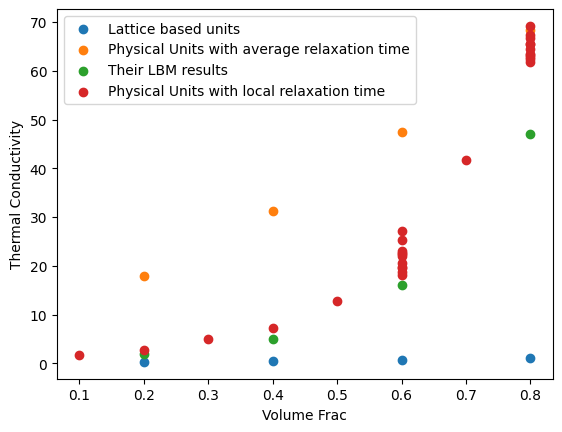

In [50]:
plt.scatter([0.2, 0.4, 0.6, 0.8], [0.29855, 0.5, 0.724, 1.108], label='Lattice based units')
plt.scatter([0.2, 0.4, 0.6, 0.8], [17.83, 31.16, 47.43, 68.32], label='Physical Units with average relaxation time')
plt.scatter([0.2, 0.4, 0.6, 0.8], [2, 5, 16, 47], label='Their LBM results')
plt.scatter(vols, conds, label='Physical Units with local relaxation time')
plt.legend()
plt.xlabel('Volume Frac')
plt.ylabel('Thermal Conductivity')

Text(0, 0.5, 'k(W/mK)')

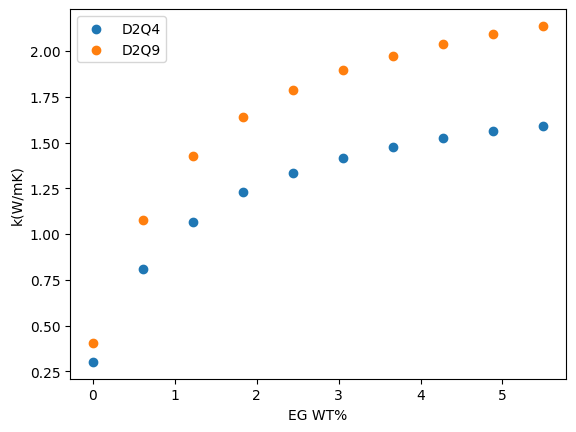

In [85]:
plt.scatter(wts, conds, label='D2Q4')
plt.scatter(wts1, conds1, label='D2Q9')
plt.legend()
plt.xlabel('EG WT%')
plt.ylabel('k(W/mK)')

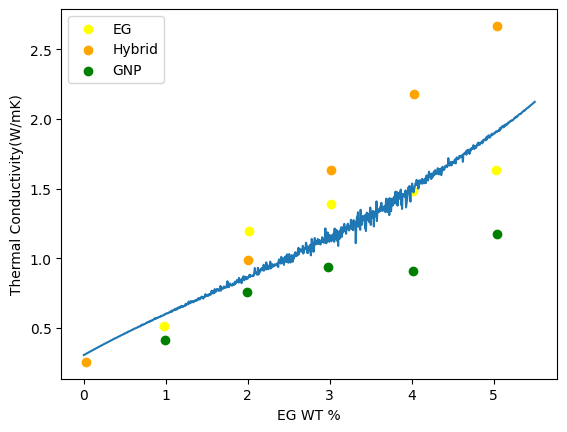

In [386]:
sPVol=[np.sum(x[0])/160**2 for x in data1]
experimentEG=[0.9808358718952985, 0.5177376980481276, 2.0206308527956423, 1.195872217655497, 3.017552342730042, 1.3927034476089164, 4.012604161629838, 1.4813274664345695, 5.026094805215738, 1.6370984639685382]
hybrid=[0.026014215947004038, 0.25743436004061665, 2.0083812839482293, 0.9869284206115113, 3.0130393436809957, 1.6315136276453428, 4.024595844817305, 2.1753461309092086, 5.043888915751978, 2.666932611253486]
gnp=[0.9877343132988412, 0.41698499427816166, 1.9957448866108987, 0.7555969247135054, 2.9838337926921654, 0.9412423641667874, 4.011379204745097, 0.9104330867301706, 5.035443160388763, 1.1781345196073696]
# plt.plot([x[-1] for x in data1[:-15]], [x[-2] for x in data1[:-15]])
plt.plot([x[-1] for x in static_data], [x[-2] for x in static_data])
plt.scatter(experimentEG[::2], experimentEG[1::2], label='EG', color='yellow')
plt.scatter(hybrid[::2], hybrid[1::2], label='Hybrid', color='orange')
plt.scatter(gnp[::2], gnp[1::2], label='GNP', color='green')
plt.plot()
plt.xlabel('EG WT %')
plt.ylabel('Thermal Conductivity(W/mK)')
plt.legend()

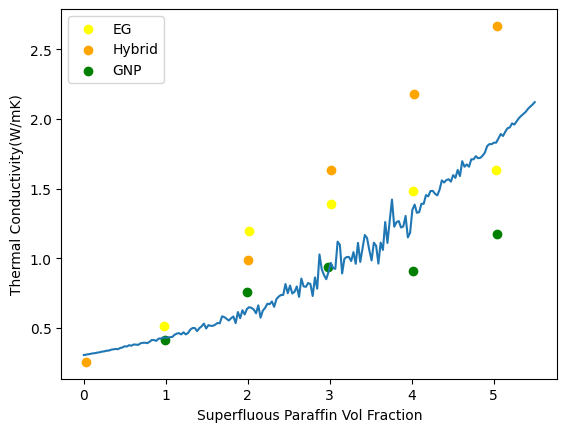

In [387]:
sPVol=[np.sum(x[0])/160**2 for x in data]
plt.plot([x[-1] for x in data], [x[-2] for x in data])
plt.scatter(experimentEG[::2], experimentEG[1::2], label='EG', color='yellow')
plt.scatter(hybrid[::2], hybrid[1::2], label='Hybrid', color='orange')
plt.scatter(gnp[::2], gnp[1::2], label='GNP', color='green')
plt.xlabel('Superfluous Paraffin Vol Fraction')
plt.ylabel('Thermal Conductivity(W/mK)')
plt.legend()

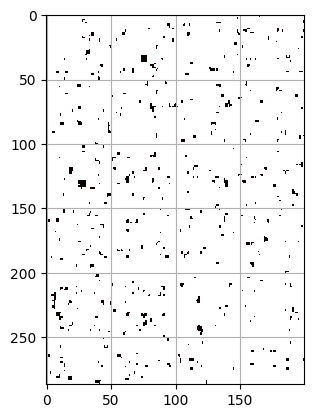

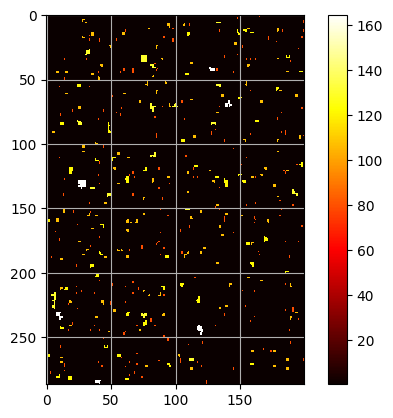

relaxation times 0.8265783660449808 0.5004824451476909
0 0.00043402708280073564
10000 2.7308313819120367e-07
20000 1.3697168650030188e-07
30000 9.202174910648348e-08
40000 6.927761286206706e-08
50000 5.54879491751134e-08
60000 4.626626321637299e-08
70000 3.969194767700594e-08
80000 3.4779796475591516e-08
90000 3.0972697272464236e-08
100000 2.7933972669322124e-08
110000 2.544976621519018e-08
120000 2.337864287074556e-08
130000 2.162378148643583e-08
140000 2.011684997216898e-08
150000 1.8808281303894973e-08
160000 1.7661218937561064e-08
170000 1.6647638583611876e-08
180000 1.574579900118217e-08
190000 1.4938531034546333e-08
200000 1.4212060141577803e-08
210000 1.3555181078120184e-08
220000 1.2958667004497879e-08
230000 1.2414840360648386e-08
240000 1.1917251521100905e-08
250000 1.1460439677072306e-08
260000 1.1039747383017129e-08
270000 1.0651177797152892e-08
280000 1.0291281447300366e-08
290000 9.9570667283121e-09
300000 9.64592714429496e-09
310000 9.35558242924661e-09
320000 9.08403058

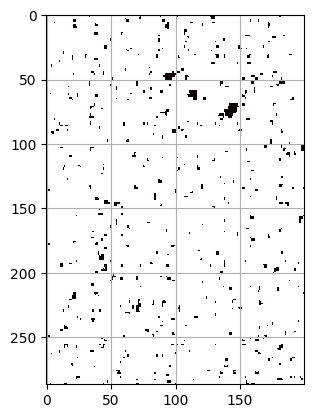

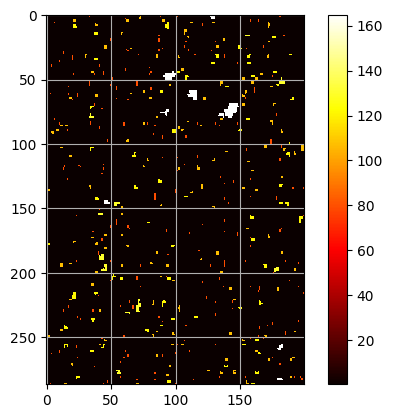

relaxation times 0.8270343810445355 0.5004824451476909
0 0.00043402708280073564
10000 3.3278645440118567e-07
20000 1.7191638238388708e-07
30000 1.1748007228794263e-07
40000 8.975350928511448e-08
50000 7.281013907967171e-08
60000 6.134463933284325e-08
70000 5.305782956010559e-08
80000 4.6783174348182904e-08
90000 4.186407567080834e-08
100000 3.790209776724311e-08
110000 3.464108402680711e-08
120000 3.1908672045863425e-08
130000 2.9584580648235967e-08
140000 2.7582352464316163e-08
150000 2.583830355919302e-08
160000 2.43045422381122e-08
170000 2.294440063578467e-08
180000 2.172935446403352e-08
190000 2.0636892873348587e-08
200000 1.9649018292021403e-08
210000 1.87511660463063e-08
220000 1.7931418299544074e-08
230000 1.717992152473602e-08
240000 1.648845234612198e-08
250000 1.5850084834370933e-08
260000 1.525894077560253e-08
270000 1.47099926912296e-08
280000 1.4198911666746713e-08
290000 1.3721946980027997e-08
300000 1.3275830423110134e-08
310000 1.2857699681274152e-08
320000 1.246503478

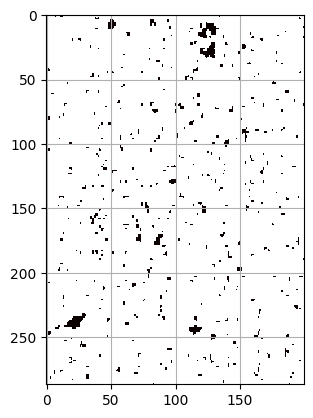

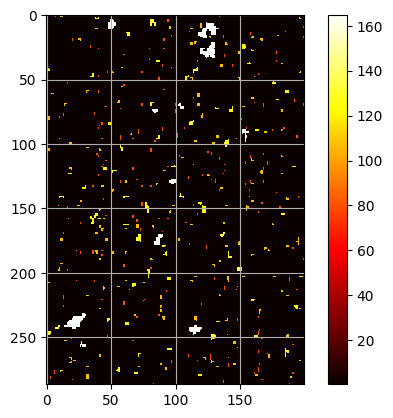

relaxation times 0.8271683619738823 0.5004824451476909
0 0.00043402708280073564
10000 3.228550711282953e-07
20000 1.629082125924441e-07
30000 1.0936947688029907e-07
40000 8.235352582548108e-08
50000 6.60324745156976e-08
60000 5.513257816596987e-08
70000 4.736435264286617e-08
80000 4.1562140987014105e-08
90000 3.706900304652662e-08
100000 3.3487941376329644e-08
110000 3.056614021831195e-08
120000 2.8135656796903798e-08
130000 2.6080896518416927e-08
140000 2.4319835847484693e-08
150000 2.279271601887927e-08
160000 2.145498829602771e-08
170000 2.0272769114538275e-08
180000 1.9219830153152565e-08
190000 1.8275551491280814e-08
200000 1.7423499969871436e-08
210000 1.665041770218861e-08
220000 1.5945492053202708e-08
230000 1.5299817576990392e-08
240000 1.4705995090147117e-08
250000 1.4157825315876259e-08
260000 1.3650077415707718e-08
270000 1.3178305978873808e-08
280000 1.2738709549608242e-08
290000 1.2328016760810525e-08
300000 1.1943397974934638e-08
310000 1.1582391386947915e-08
320000 1.12

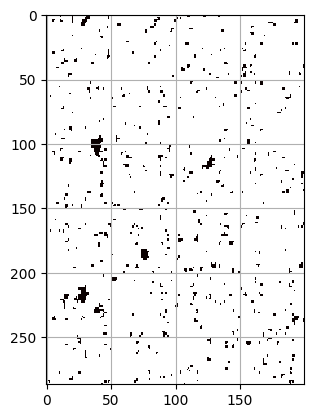

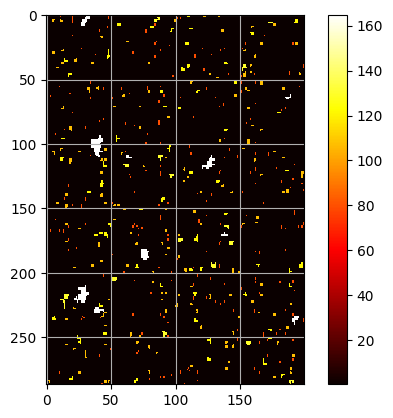

relaxation times 0.8269947456809968 0.5004824451476909
0 0.00043402708280073564
10000 3.887993260711097e-07
20000 1.9871636040869075e-07
30000 1.3331898493737425e-07
40000 1.0048814511393582e-07
50000 8.069416632196613e-08
60000 6.737399050665658e-08
70000 5.775792508791839e-08
80000 5.048095328199818e-08
90000 4.4787169200162885e-08


KeyboardInterrupt: 

In [320]:
from math import ceil
gnp4Conds2=[]
gnp4Temps2=[]
gnp4Grids2=[]

heights=[]
widths=[]

import cv2
for i in range(20, 221, 20):
    # Load the image
    image_path = f'./data/gnp4_{i}.png'
    length=7923e-6
    width=5085e-6
    resolution=20e-6
    cols=ceil(width/resolution)
    rows=ceil(length/resolution)
    image = cv2.imread(image_path)

    # Convert to RGB for displaying purposes
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert the image to HSV color space for better color segmentation
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the color range for detecting the blue box
    blue_lower = np.array([90, 50, 50])  # Lower bound of blue in HSV
    blue_upper = np.array([130, 255, 255])  # Upper bound of blue in HSV

    # Create a mask for the blue color
    blue_mask = cv2.inRange(hsv_image, blue_lower, blue_upper)

    # Find contours from the mask
    contours, _ = cv2.findContours(blue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours by area and assume the largest is the blue box
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    blue_box_contour = contours[0] if contours else None

    # Draw the detected contour on a copy of the original image for visualization
    contour_image = image_rgb.copy()
    if blue_box_contour is not None:
        cv2.drawContours(contour_image, [blue_box_contour], -1, (255, 0, 0), 2)

    # Check if contour was detected
    blue_box_contour is not None

    epsilon = 0.02 * cv2.arcLength(blue_box_contour, True)
    approx_corners = cv2.approxPolyDP(blue_box_contour, epsilon, True)

    # Ensure we have 4 points (a quadrilateral)
    if len(approx_corners) == 4:
        # Sort the corners to identify top-left, top-right, bottom-left, bottom-right
        approx_corners = approx_corners[:, 0, :]  # Remove unnecessary dimensions
        rect = np.zeros((4, 2), dtype="float32")

        # Sum and diff to identify corners (top-left, bottom-right, etc.)
        s = approx_corners.sum(axis=1)
        diff = np.diff(approx_corners, axis=1)

        rect[0] = approx_corners[np.argmin(s)]  # Top-left
        rect[2] = approx_corners[np.argmax(s)]  # Bottom-right
        rect[1] = approx_corners[np.argmin(diff)]  # Top-right
        rect[3] = approx_corners[np.argmax(diff)]  # Bottom-left

        # Define the destination points for perspective transform (160x160 output)
        dest = np.array([[0, 0], [cols, 0], [cols, rows], [0, rows]], dtype="float32")

        # Compute the perspective transform matrix
        M = cv2.getPerspectiveTransform(rect, dest)

        # Warp the perspective to flatten the blue box
        warped = cv2.warpPerspective(image, M, (cols, rows))

        # Convert to RGB for visualization
        warped_rgb = cv2.cvtColor(warped, cv2.COLOR_BGR2RGB)
    else:
        print("Failed to detect four corners of the blue box.")

    warped_rgb=torch.tensor(warped_rgb, dtype=torch.float32)

    diff_threshold = 20      # Maximum allowed difference between channels
    brightness_threshold = 20  # Minimum brightness to consider (avoids black)

    # Calculate the difference between the max and min channel values per pixel.
    channel_diff = warped_rgb.max(dim=2).values - warped_rgb.min(dim=2).values

    # Calculate the average brightness per pixel.
    brightness = warped_rgb.mean(dim=2)

    # Create a mask: the pixel is gray if the channel difference is small and brightness is above the threshold.
    gray_mask = (channel_diff < diff_threshold) & (brightness > brightness_threshold) & (brightness < 250)

    # Set non-gray pixels to black (0,0,0)
    warped_rgb[~gray_mask, :] = 0

    # Set gray pixels to white (1,1,1) – which will appear as white when transformed back to an image.
    warped_rgb[gray_mask, :] = 1
    warped_rgb=warped_rgb[:,:,0]
    warped_rgb=warped_rgb[5:-5,5:-5]

    if warped_rgb.shape[0]>287:
        warped_rgb=warped_rgb[:287]
    if warped_rgb.shape[1]>200:
        warped_rgb=warped_rgb[:,:200]

    mapping=gammaMapping[0.0006][4]
    cond, T, distF=lbm(grid=warped_rgb, ks=[0.305, 2200], rhos=[914, 700], cps=[2140, 2229], dt=1e-6, length=length, width=width)
    gnp4Conds2.append(cond)
    gnp4Grids2.append(warped_rgb)
    gnp4Temps2.append(T)

2.0018331191219847


C:\Users\User\AppData\Local\Temp\ipykernel_16552\2855710800.py:11: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  grid=np.array(grid, dtype=np.float32)


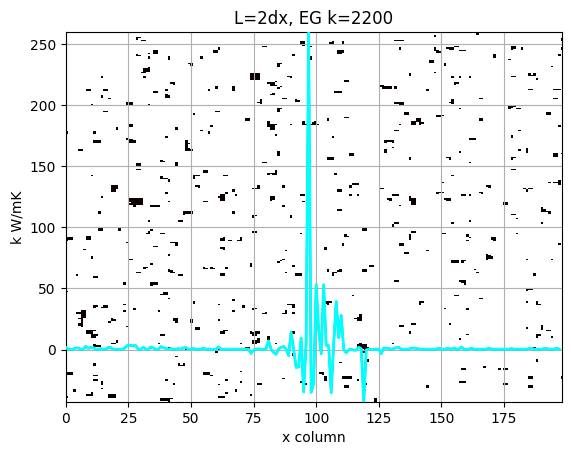

0.8949725157382342


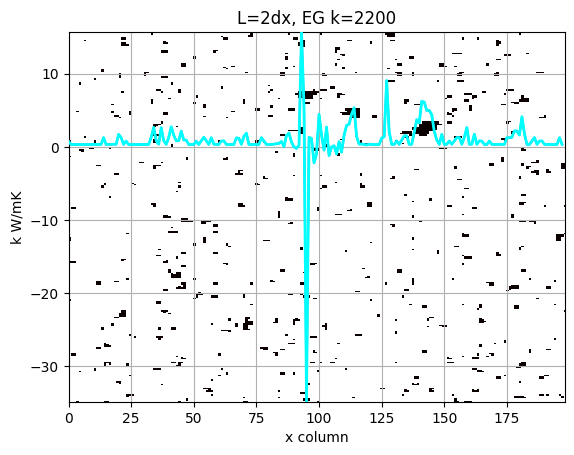

1.887553004900584


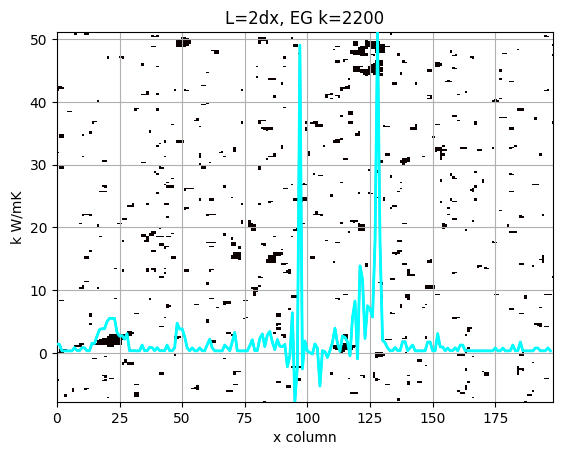

In [321]:
for conds, grid in zip(gnp4Conds2, gnp4Grids2):
    fig, ax = plt.subplots()
    plt.plot(range(198), conds)
    plt.ylabel('k W/mK')
    plt.xlabel('x column')
    plt.title('L=2dx, EG k=2200')
    ax.imshow(grid, cmap='hot', interpolation='nearest', extent=[0, 198, np.min(conds), np.max(conds)], aspect='auto')
    ax.plot(range(198), conds, color='cyan', linewidth=2, zorder=10)

    # Compute the number of zeros in each column of the grid
    grid=np.array(grid, dtype=np.float32)
    zeros_count=np.sum(grid==0, axis=0)
    
    # Create a secondary y-axis for the zeros count
    # ax2 = ax.twinx()
    # ax2.plot(range(158), zeros_count, color='orange', linewidth=2, zorder=10)
    # ax2.set_ylabel('Count of 0s')
    
    ax.grid(True)
    print(np.mean(conds))
    low_gamma_conds.append(np.mean(conds))
    plt.pause(0.1)

1.6567204010065302


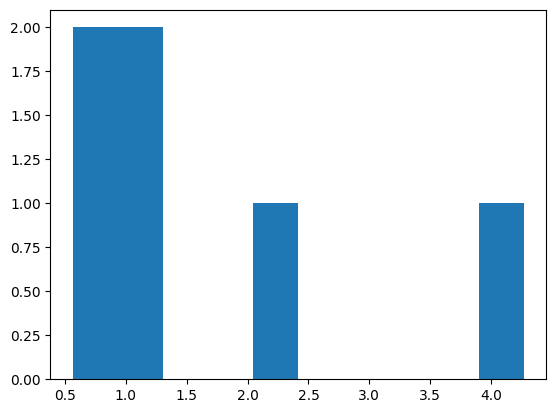

In [309]:
plt.hist([sum(conds)/len(conds) for conds in gnp4Conds])
print(sum([sum(conds)/len(conds) for conds in gnp4Conds])/len(gnp4Conds))

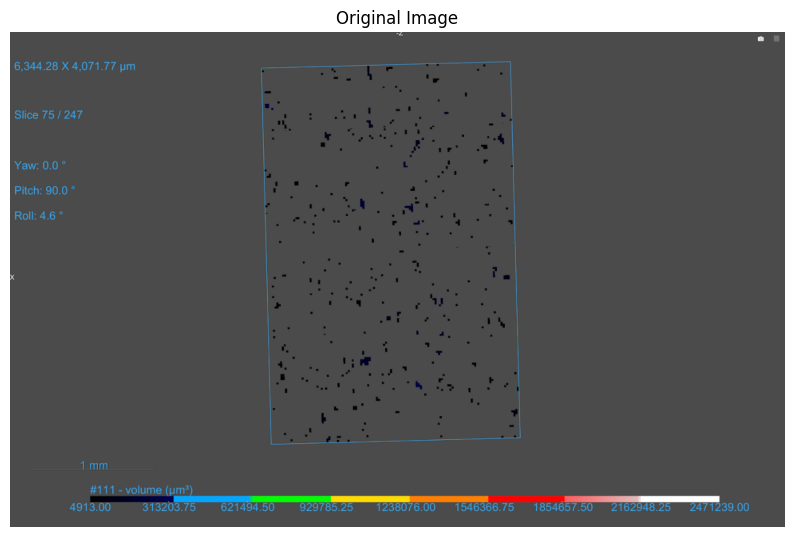

In [276]:
import cv2

# Load the image
image_path = "./data/gnp2_75.PNG"
image = cv2.imread(image_path)

# Convert to RGB for displaying purposes
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the original image to visualize
plt.figure(figsize=(10, 8))
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

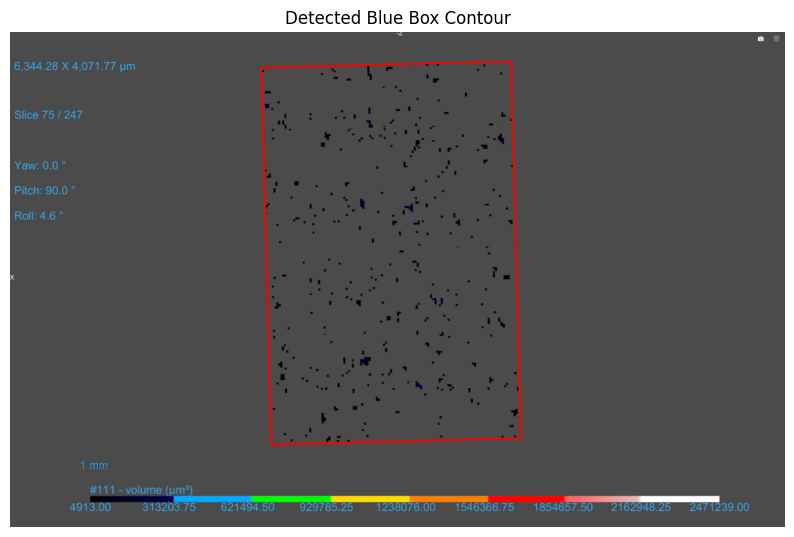

True

In [277]:
# Convert the image to HSV color space for better color segmentation
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the color range for detecting the blue box
blue_lower = np.array([90, 50, 50])  # Lower bound of blue in HSV
blue_upper = np.array([130, 255, 255])  # Upper bound of blue in HSV

# Create a mask for the blue color
blue_mask = cv2.inRange(hsv_image, blue_lower, blue_upper)

# Find contours from the mask
contours, _ = cv2.findContours(blue_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours by area and assume the largest is the blue box
contours = sorted(contours, key=cv2.contourArea, reverse=True)
blue_box_contour = contours[0] if contours else None

# Draw the detected contour on a copy of the original image for visualization
contour_image = image_rgb.copy()
if blue_box_contour is not None:
    cv2.drawContours(contour_image, [blue_box_contour], -1, (255, 0, 0), 2)

# Display the image with the detected contour
plt.figure(figsize=(10, 8))
plt.imshow(contour_image)
plt.title("Detected Blue Box Contour")
plt.axis("off")
plt.show()

# Check if contour was detected
blue_box_contour is not None

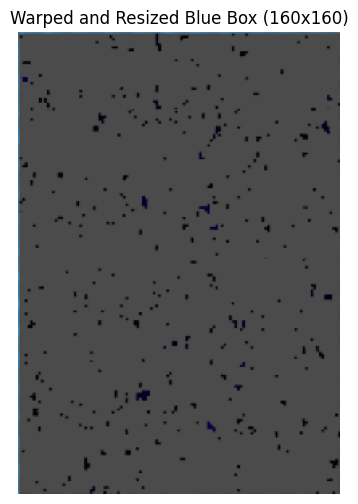

In [278]:
epsilon = 0.02 * cv2.arcLength(blue_box_contour, True)
approx_corners = cv2.approxPolyDP(blue_box_contour, epsilon, True)

# Ensure we have 4 points (a quadrilateral)
if len(approx_corners) == 4:
    # Sort the corners to identify top-left, top-right, bottom-left, bottom-right
    approx_corners = approx_corners[:, 0, :]  # Remove unnecessary dimensions
    rect = np.zeros((4, 2), dtype="float32")

    # Sum and diff to identify corners (top-left, bottom-right, etc.)
    s = approx_corners.sum(axis=1)
    diff = np.diff(approx_corners, axis=1)

    rect[0] = approx_corners[np.argmin(s)]  # Top-left
    rect[2] = approx_corners[np.argmax(s)]  # Bottom-right
    rect[1] = approx_corners[np.argmin(diff)]  # Top-right
    rect[3] = approx_corners[np.argmax(diff)]  # Bottom-left

    # Define the destination points for perspective transform (160x160 output)
    dest = np.array([[0, 0], [200, 0], [200, 287], [0, 287]], dtype="float32")

    # Compute the perspective transform matrix
    M = cv2.getPerspectiveTransform(rect, dest)

    # Warp the perspective to flatten the blue box
    warped = cv2.warpPerspective(image, M, (200, 287))

    # Convert to RGB for visualization
    warped_rgb = cv2.cvtColor(warped, cv2.COLOR_BGR2RGB)

    # Display the result
    plt.figure(figsize=(6, 6))
    plt.imshow(warped_rgb)
    plt.title("Warped and Resized Blue Box (160x160)")
    plt.axis("off")
    plt.show()
else:
    print("Failed to detect four corners of the blue box.")

(array([2.68000e+03, 1.67400e+03, 2.78700e+03, 1.64087e+05, 8.00000e+01,
        3.90000e+02, 2.48000e+02, 2.01000e+02, 4.50000e+01, 8.00000e+00]),
 array([  0.        ,  22.10000038,  44.20000076,  66.30000305,
         88.40000153, 110.5       , 132.6000061 , 154.69999695,
        176.80000305, 198.90000916, 221.        ]),
 <BarContainer object of 10 artists>)

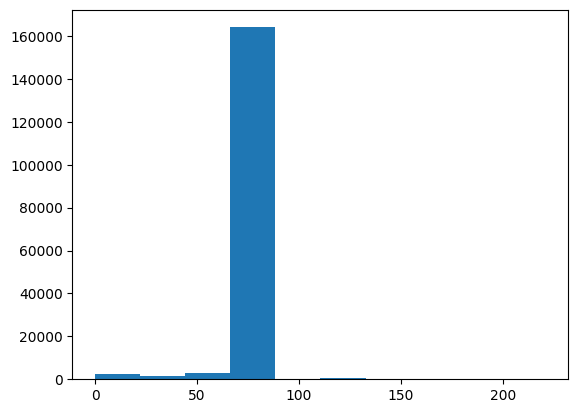

In [279]:
warped_rgb=torch.tensor(warped_rgb, dtype=torch.float32)
plt.hist(warped_rgb.flatten())

In [280]:
# threshold = 20  # You can adjust this depending on how strict you want the gray detection

# # Check if the pixel is gray (R, G, B are close to each other)
# gray_mask = torch.abs(warped_rgb[:,:,0] - warped_rgb[:,:,1]) < threshold
# gray_mask &= torch.abs(warped_rgb[:,:,1] - warped_rgb[:,:,2]) < threshold

# # Set non-gray pixels to black (0,0,0)
# warped_rgb[~gray_mask, :] = 0

# # Set gray pixels to white (255, 255, 255)
# warped_rgb[gray_mask, :] = 1
# # tensorToImageTransform(warped_rgb)
diff_threshold = 20      # Maximum allowed difference between channels
brightness_threshold = 20  # Minimum brightness to consider (avoids black)

# Calculate the difference between the max and min channel values per pixel.
channel_diff = warped_rgb.max(dim=2).values - warped_rgb.min(dim=2).values

# Calculate the average brightness per pixel.
brightness = warped_rgb.mean(dim=2)

# Create a mask: the pixel is gray if the channel difference is small and brightness is above the threshold.
gray_mask = (channel_diff < diff_threshold) & (brightness > brightness_threshold) & (brightness < 250)

# Set non-gray pixels to black (0,0,0)
warped_rgb[~gray_mask, :] = 0

# Set gray pixels to white (1,1,1) – which will appear as white when transformed back to an image.
warped_rgb[gray_mask, :] = 1

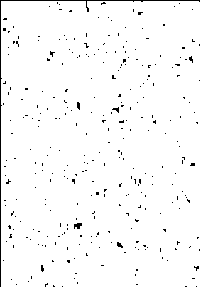

In [281]:
warped_rgb=warped_rgb[:,:,0]
tensorToImageTransform(warped_rgb[:,:])

In [267]:
torch.sum(1-warped_rgb)/(warped_rgb.shape[0]*warped_rgb.shape[1])
grid=[[0 for i in range(160)] for j in range(160)]
grid=generateSample3(160, 160, (random.random()%0.0005)+0.6555, 0.05, 3.99)

0.749444660378442 16705 25600


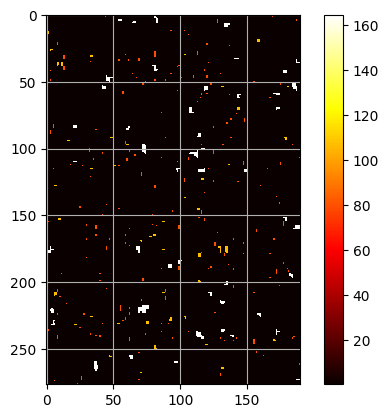

In [268]:
warped_rgb=warped_rgb[5:-5,5:-5]
mapping=gammaMapping[0.0006][4]
effective_k_map = assign_effective_k_map(warped_rgb, mapping, default_k=2200)
kMap = np.where(warped_rgb==1, 0.305, effective_k_map)
plt.imshow(kMap, cmap='hot', interpolation='nearest')
plt.grid()
plt.colorbar()
plt.pause(0.1)

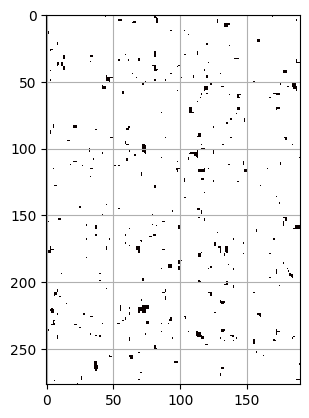

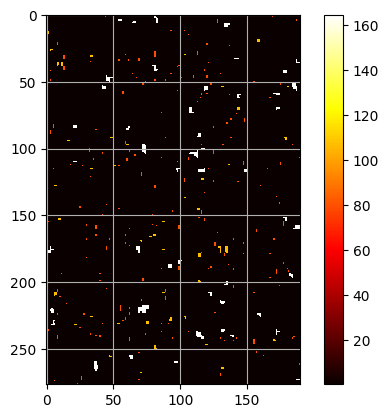

relaxation times 0.9601280087094131 0.5006793207228799
0 0.00044530235364435193
10000 2.057327809646044e-07
20000 1.0979231258931002e-07
30000 7.612634765495661e-08
40000 5.860626235486458e-08
50000 4.780887736650145e-08
60000 4.049527442631616e-08
70000 3.522589869261935e-08
80000 3.125454142710026e-08
90000 2.815452654493188e-08
100000 2.5665048155934448e-08
110000 2.36186303949859e-08
120000 2.1903412723397705e-08
130000 2.044216528403784e-08
140000 1.9180017961433587e-08
150000 1.8076990004109086e-08
160000 1.7103292338715573e-08
170000 1.623628354537815e-08
180000 1.5458444544408147e-08
190000 1.4756001705383841e-08
200000 1.4117967744673015e-08
210000 1.3535463252747189e-08
220000 1.3001226708345289e-08
230000 1.250925411721351e-08
240000 1.2054533818143943e-08
250000 1.1632843708387853e-08
260000 1.1240598101658694e-08
270000 1.0874728558938745e-08
280000 1.0532593005220643e-08
290000 1.0211900399682715e-08
300000 9.910653746131518e-09
310000 9.627102935375903e-09
320000 9.35970

In [269]:
mapping=gammaMapping[0.0006][2]
cond, T, distF=lbm(grid=warped_rgb, ks=[0.305, 2200], rhos=[914, 700], cps=[2140, 2229], dt=1e-6, length=6344e-6, width=4071e-6)
# cond, T=lbm(grid, 0.5975, 1.175)
# cond, T=lbm(grid, 0.536821, 0.7988)
# graphene 2% and 4%

0.7668443972682167


C:\Users\User\AppData\Local\Temp\ipykernel_16552\1972803562.py:10: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  grid=np.array(warped_rgb, dtype=np.float32)


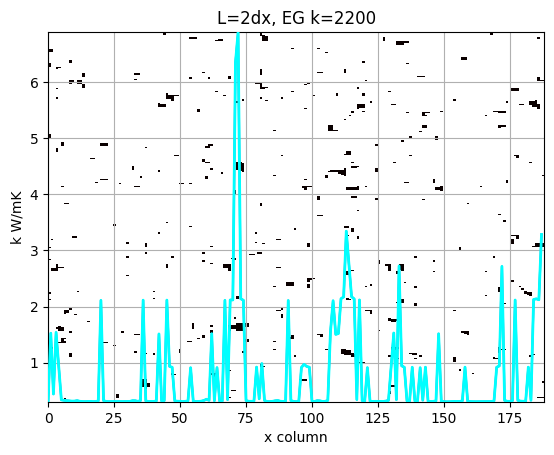

In [270]:
fig, ax = plt.subplots()
plt.plot(range(188), cond)
plt.ylabel('k W/mK')
plt.xlabel('x column')
plt.title('L=2dx, EG k=2200')
ax.imshow(warped_rgb, cmap='hot', interpolation='nearest', extent=[0, 188, np.min(cond), np.max(cond)], aspect='auto')
ax.plot(range(188), cond, color='cyan', linewidth=2, zorder=10)

# Compute the number of zeros in each column of the grid
grid=np.array(warped_rgb, dtype=np.float32)

# Create a secondary y-axis for the zeros count
# ax2 = ax.twinx()
# ax2.plot(range(158), zeros_count, color='orange', linewidth=2, zorder=10)
# ax2.set_ylabel('Count of 0s')

ax.grid(True)
print(np.mean(cond))
high_gamma_conds.append(np.mean(cond))
plt.pause(0.1)

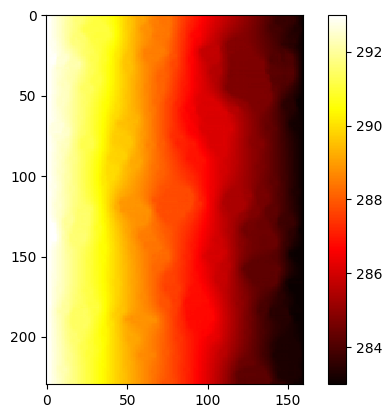

In [54]:
plt.imshow(T[:,:], cmap='hot', interpolation='nearest')
plt.colorbar()

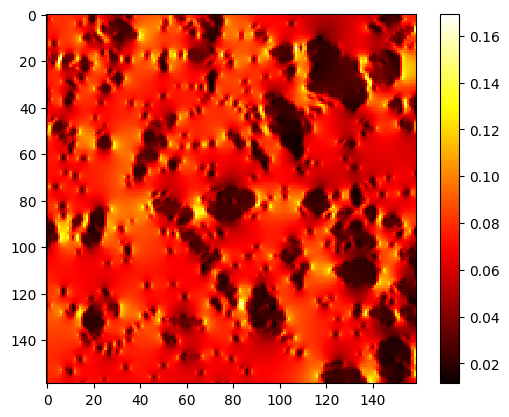

In [281]:
dT=np.sqrt((((T[:,:-1]-T[:,1:])**2)[:-1,:]+((T[:-1,:]-T[1:,:])**2)[:,:-1]))
plt.imshow(dT, cmap='hot', interpolation='nearest')
plt.colorbar()

In [66]:
heights=[]
widths=[]
r=warped_rgb.shape[0]
c=warped_rgb.shape[1]
visited=set()
dirs=[[1,0], [-1,0], [0,1], [0,-1]]
def fill(i, j):
    [r,c]=warped_rgb.shape
    if i<0 or i>=r or j<0 or j>=c or warped_rgb[i,j]==1 or str(i)+','+str(j) in visited:
        return None
    visited.add(str(i)+','+str(j))
    leftmost, rightmost, bottom, top=j, j, i, i
    for [x, y] in dirs:
        x, y=x+i, y+j
        newBoundaries=fill(x, y)
        if newBoundaries is None:
            continue
        [l,r,b,t]=newBoundaries
        leftmost=min(leftmost, l)
        rightmost=max(rightmost, r)
        bottom=max(bottom, b)
        t=min(top, t)
    return [leftmost, rightmost, bottom, top]
for i in range(r):
    for j in range(c):
        dimensions=fill(i, j)
        if dimensions is not None:
            heights.append(dimensions[1]-dimensions[0]+1)
            widths.append(dimensions[2]-dimensions[3]+1)

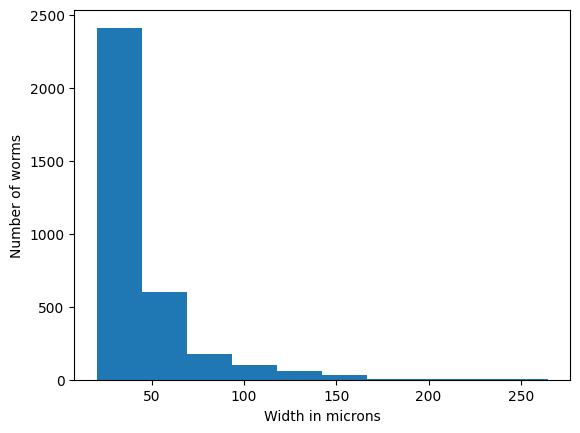

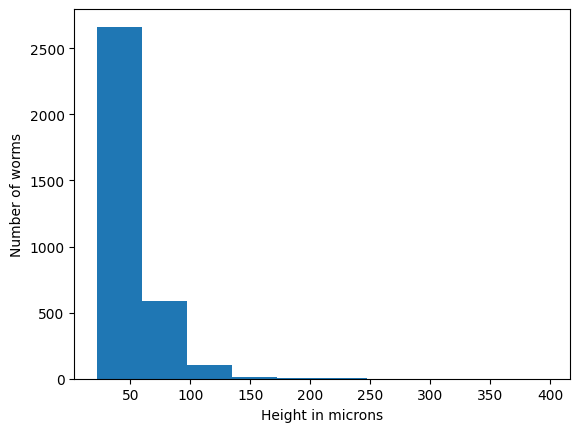

Text(0, 0.5, 'Number of worms')

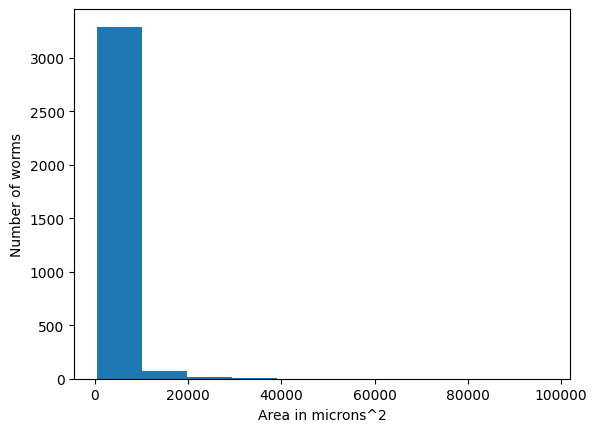

In [292]:
heightRes=6344/287
widthRes=4071/200
plt.hist([w*widthRes for w in widths[1:]])
plt.xlabel('Width in microns')
plt.ylabel('Number of worms')
plt.pause(0.1)
plt.hist([h*heightRes for h in heights[1:]])
plt.xlabel('Height in microns')
plt.ylabel('Number of worms')
plt.pause(0.1)
plt.hist([h*heightRes*w*widthRes for w, h in zip(widths[1:], heights[1:])])
plt.xlabel('Area in microns^2')
plt.ylabel('Number of worms')

In [67]:
unique_hw=set(zip(heights[1:], widths[1:]))
for [h,w] in unique_hw:
    print(h*29.575, w*27.286)
unique_hw

88.725 109.144
118.3 81.858
88.725 27.286
147.875 109.144
118.3 163.716
59.15 54.572
59.15 136.43
29.575 81.858
177.45 218.288
118.3 54.572
118.3 136.43
88.725 81.858
59.15 109.144
29.575 54.572
59.15 27.286
88.725 54.572
118.3 27.286
88.725 136.43
118.3 109.144
29.575 27.286
29.575 109.144
59.15 81.858
177.45 81.858


{(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (5, 4),
 (6, 3),
 (6, 8)}

In [57]:
r, c

(230, 160)

In [60]:
max(heights)*29.575, max(widths)*27.286

(4732.0, 6275.780000000001)

In [61]:
min(heights)*29.575, min(widths)*27.286

(29.575, 27.286)